###**Rainfall Prediction** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importing necessary libraries :-

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib  inline

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

### Reading the CSV file 

In [3]:
path = "/content/drive/MyDrive/Project/weatherAUS.csv"
df = pd.read_csv(path)
df.head()

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]

###**EDA**

In [4]:
print("No of Rows :", len(df))
print("No of Columns :", len(df.columns))

No of Rows : 145460
No of Columns : 23


Our dataset has 145460 rows and 23 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Our dataset has two data types :



1.   object
2.   float64



###**Visualization :-**

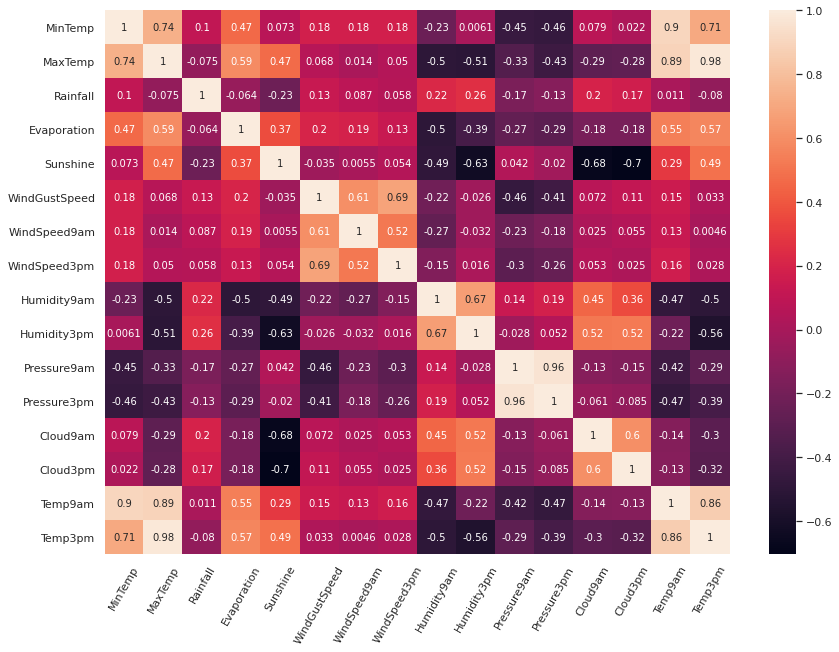

In [6]:
x = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(x ,  annot = True)
plt.xticks(rotation = 60)
plt.show()

In [7]:
plot_num = df.select_dtypes(float)

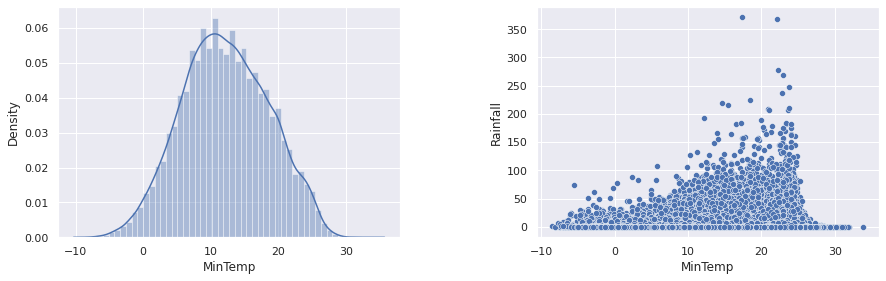

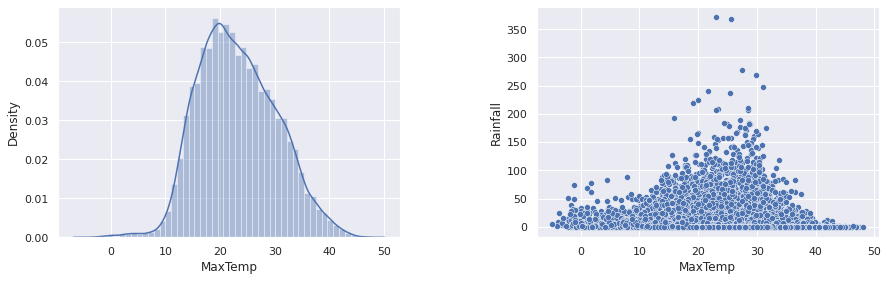

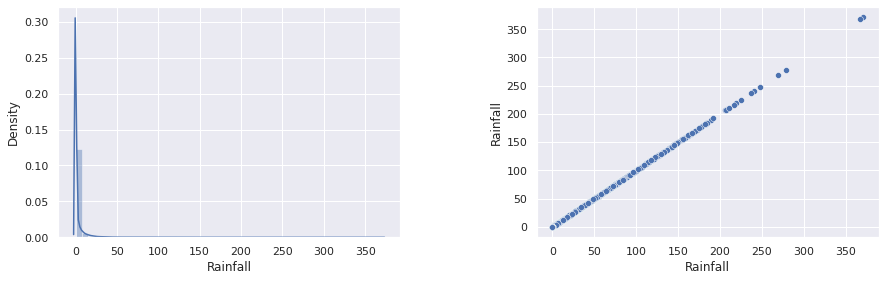

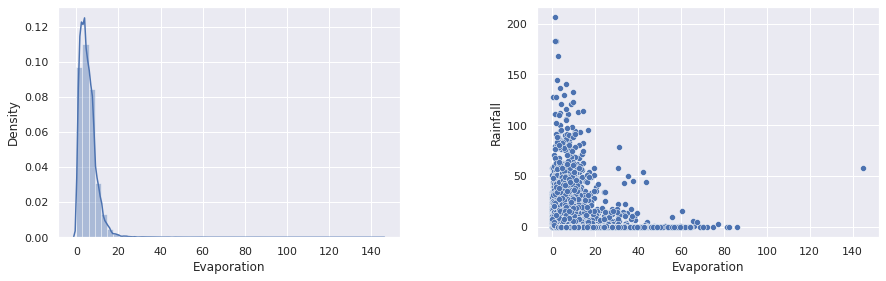

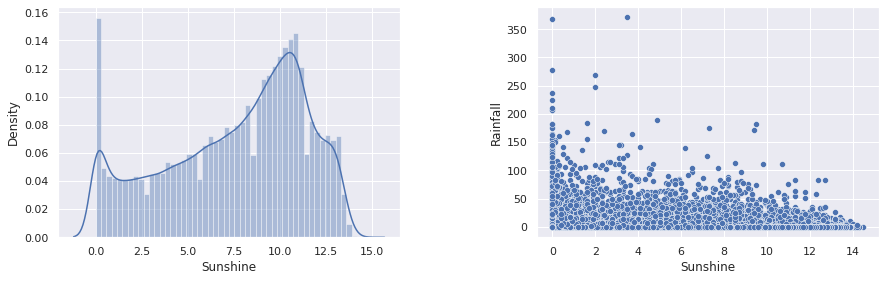

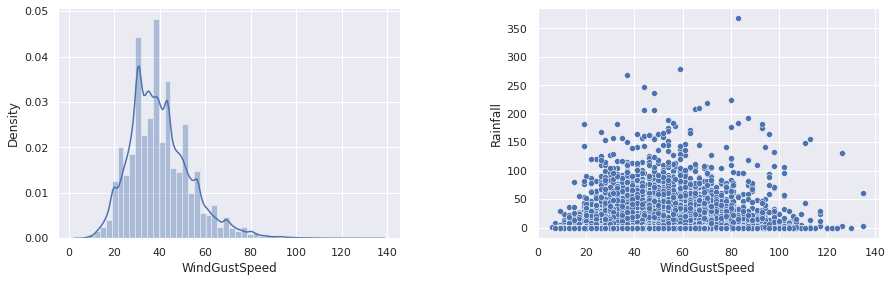

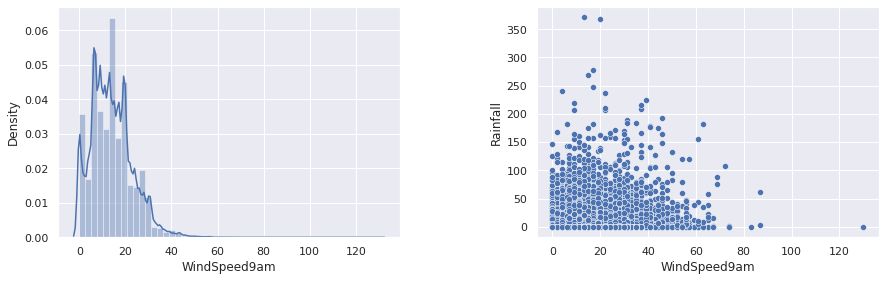

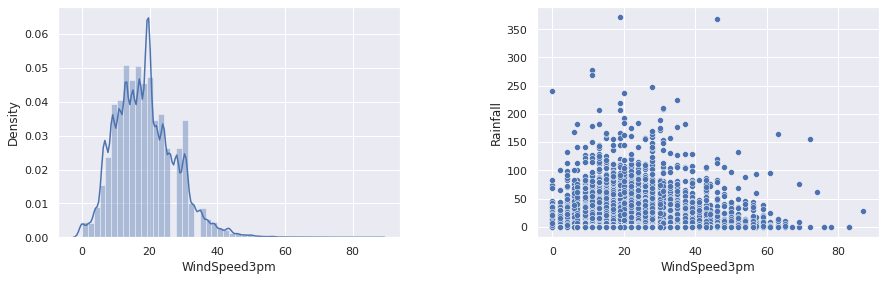

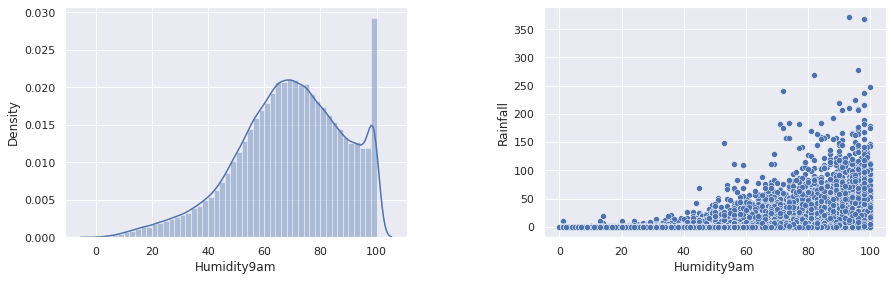

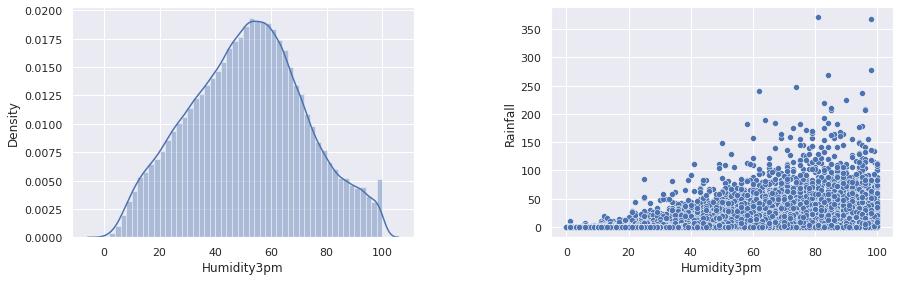

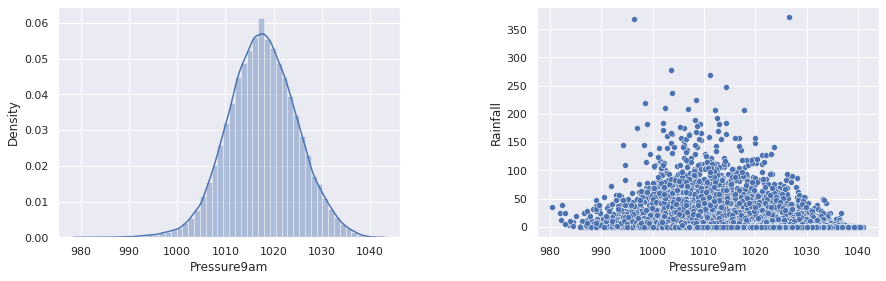

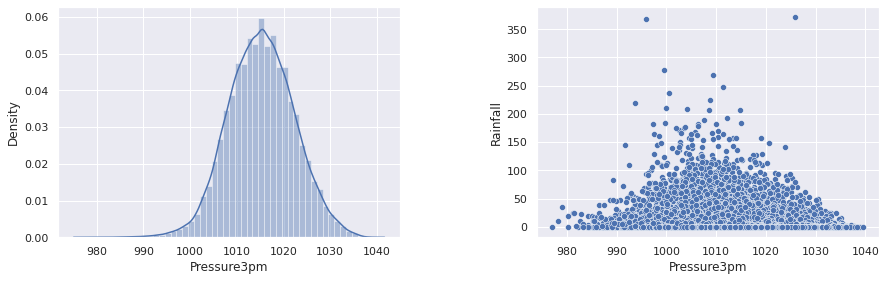

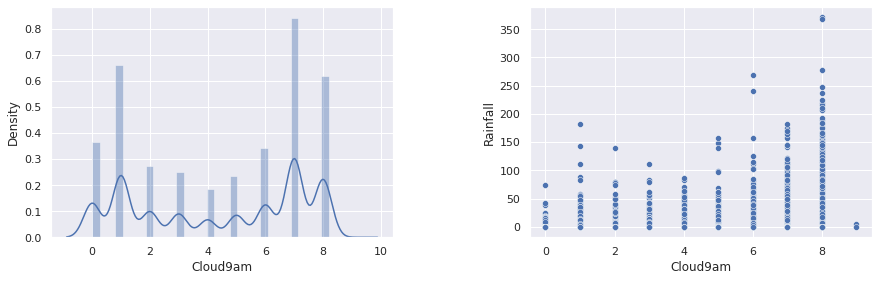

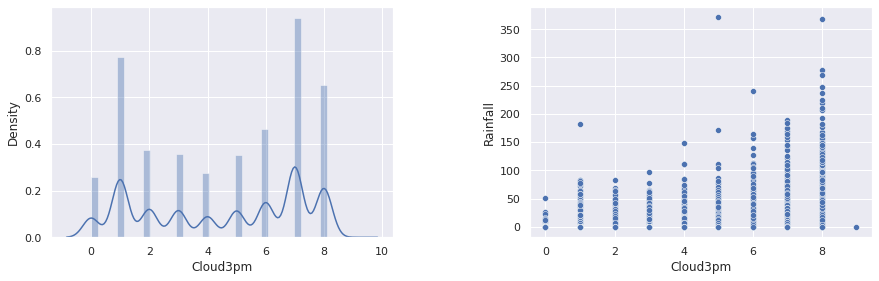

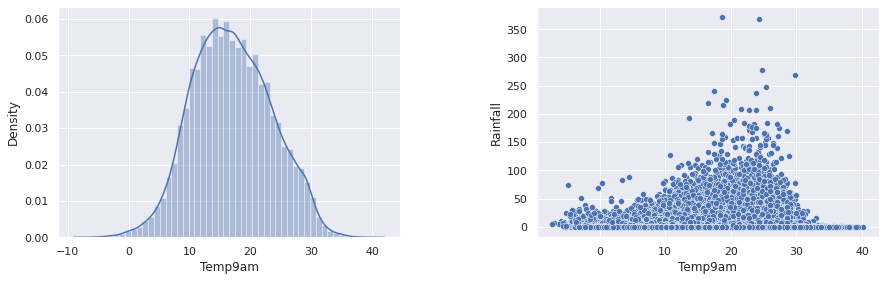

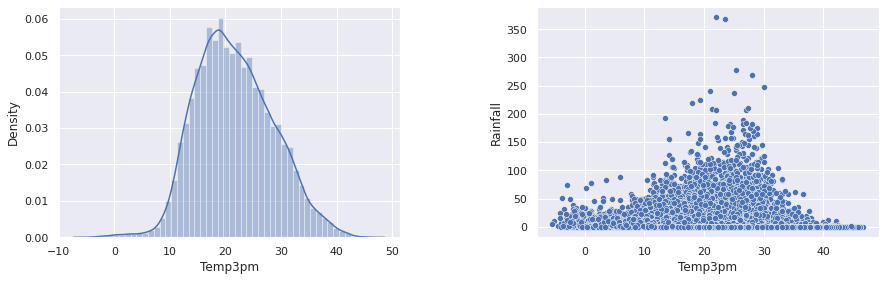

In [8]:
for col in plot_num:
  fig , ax =plt.subplots(1,2)
  sns.distplot(plot_num[col] , ax=ax[0])
  sns.scatterplot(data = plot_num , x = col , y = 'Rainfall' , ax = ax[1])
  plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
  plt.show()

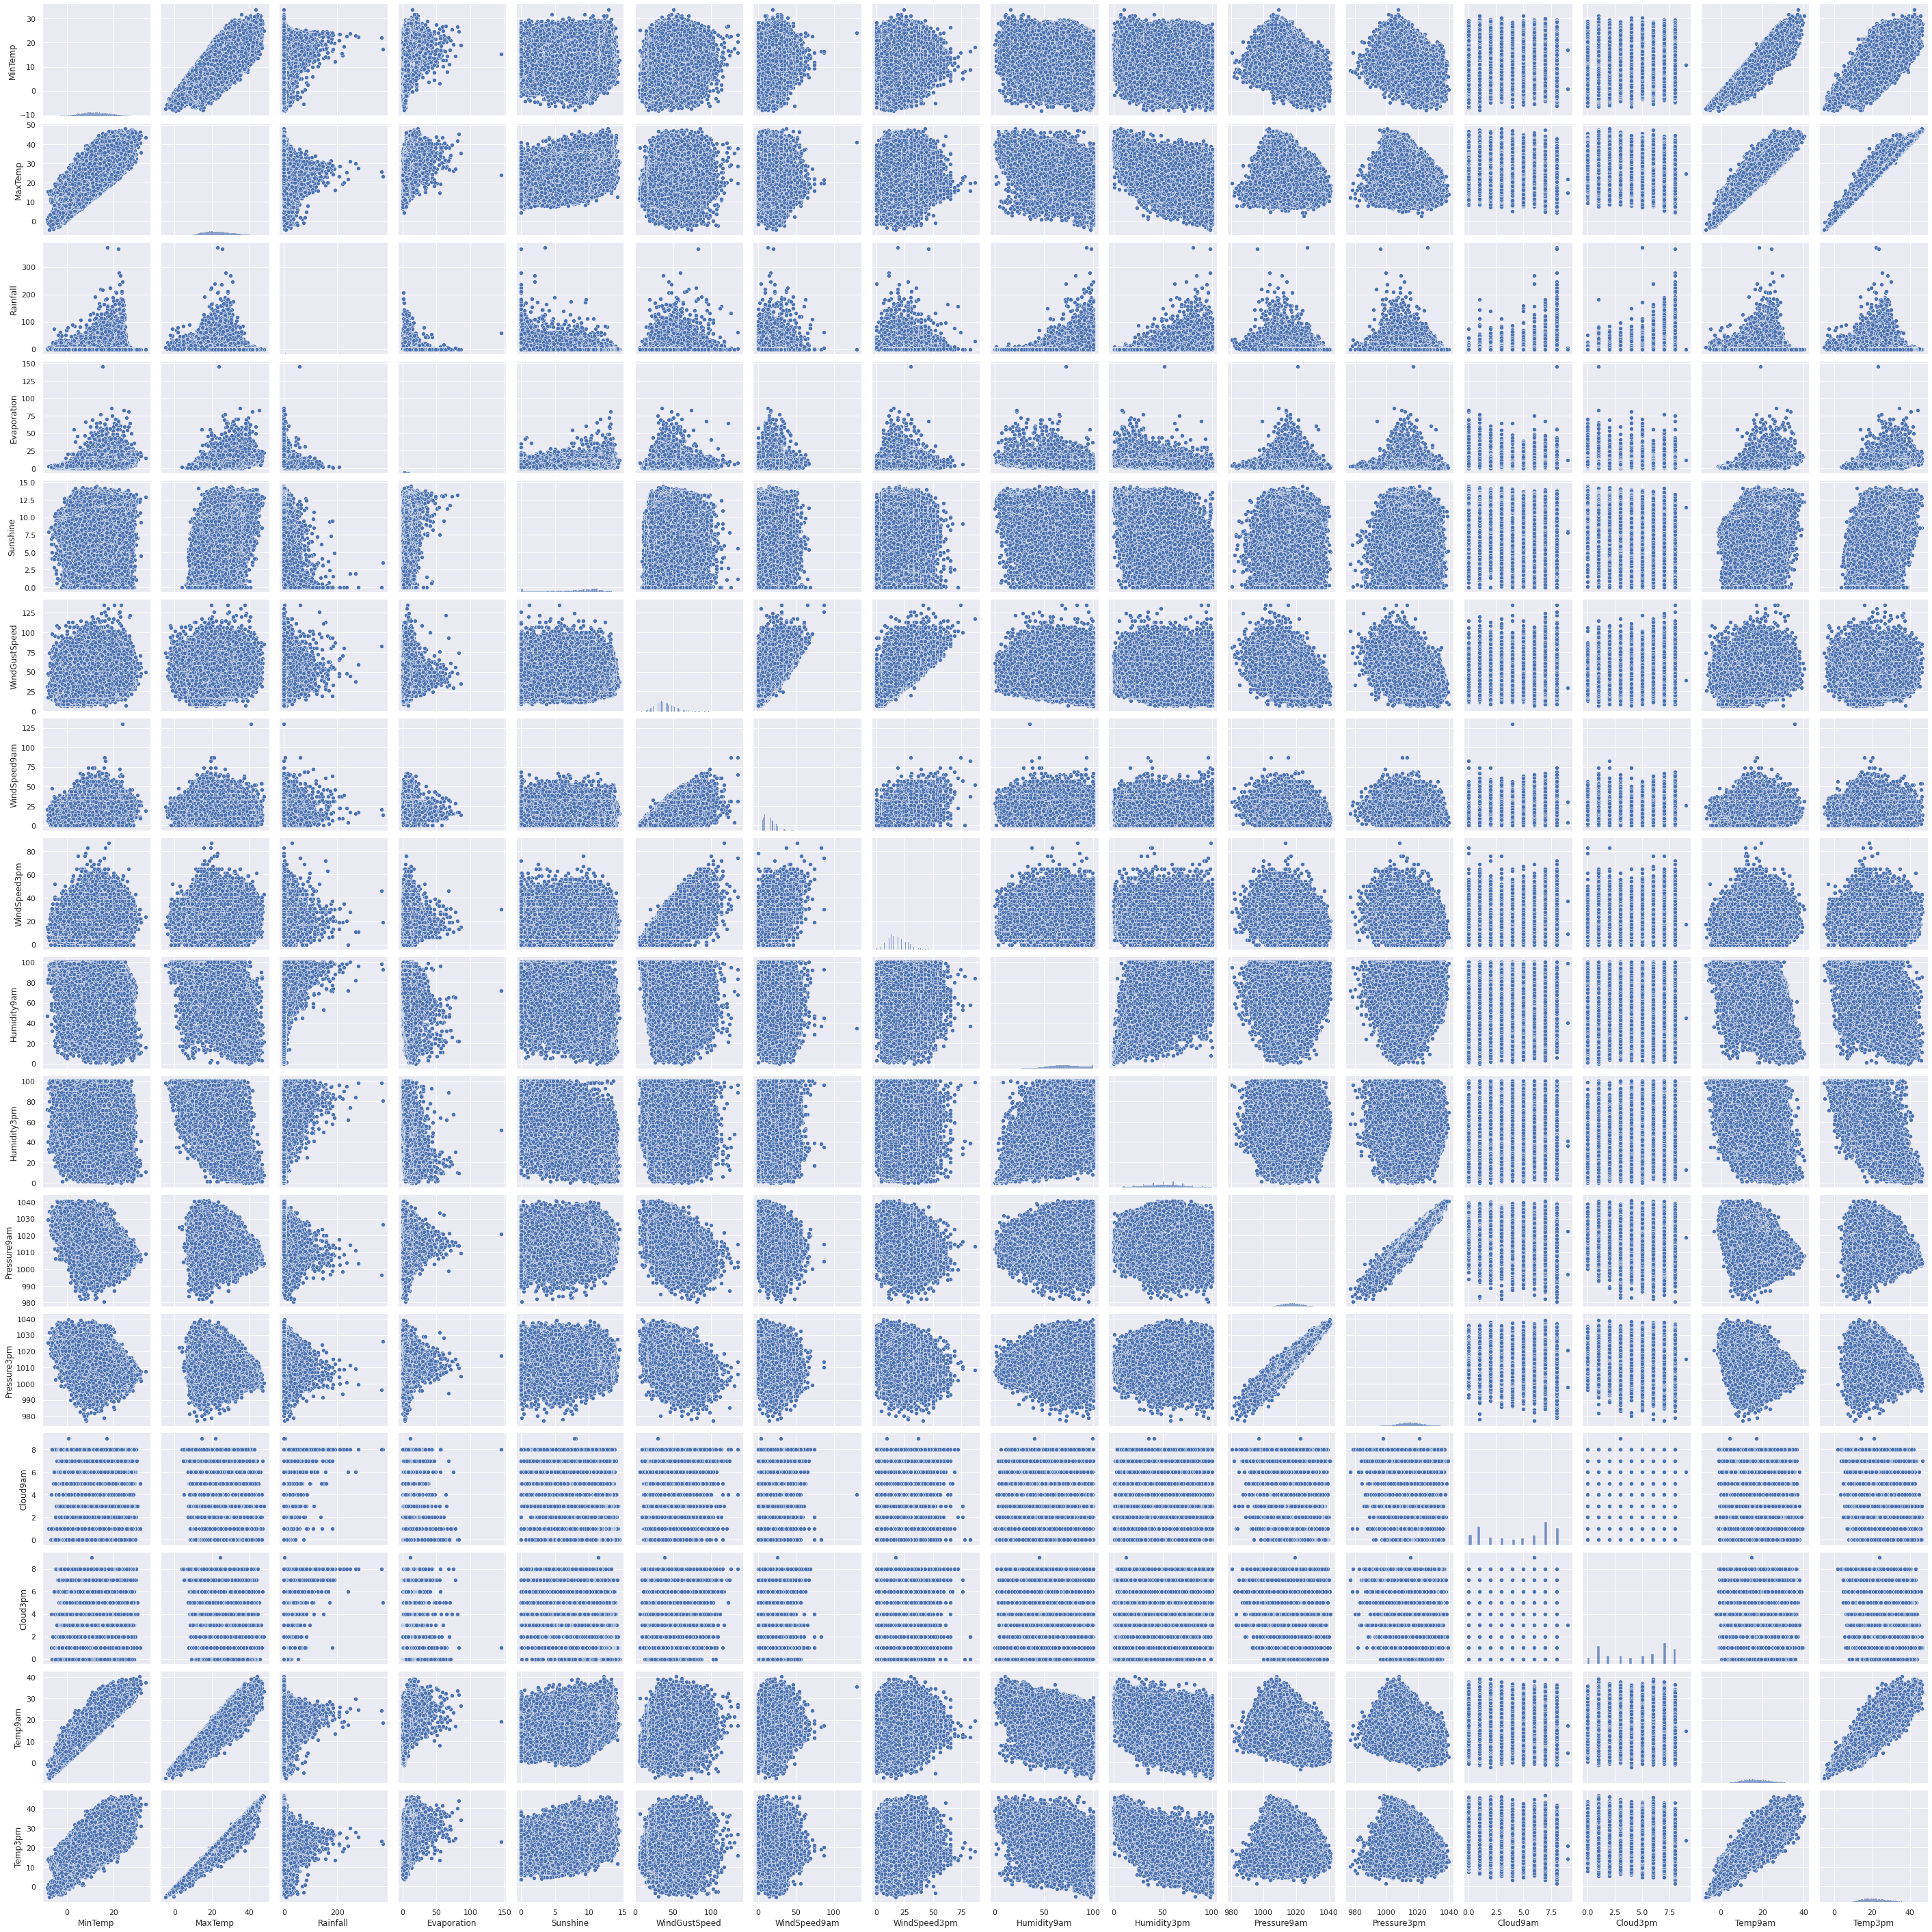

In [9]:
sns.pairplot(data = plot_num)
plt.show()

###Handling Missing values :-

In [10]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Here we can see our dataset has 4 columns :

1.   Evaporation
2.   Sunshine
3.   Cloud9am
4.   Cloud3pm

which have almost 40% - 45% of null values present.
These columns are important columns for our model building so we will not drop these columns rather we will handle the missing values.
For handling the missing values we will be using "**Random Sample Imputation"**.

We are using Radom sample imputation because it mantains the distrubution and variance of our dataset.


In [11]:
df['Evaporation'][df['Evaporation'].isnull()] = df['Evaporation'].dropna().sample(df['Evaporation'].isnull().sum()).values
df['Sunshine'][df['Sunshine'].isnull()] = df['Sunshine'].dropna().sample(df['Sunshine'].isnull().sum()).values
df['Cloud9am'][df['Cloud9am'].isnull()] = df['Cloud9am'].dropna().sample(df['Cloud9am'].isnull().sum()).values
df['Cloud3pm'][df['Cloud3pm'].isnull()] = df['Cloud3pm'].dropna().sample(df['Cloud3pm'].isnull().sum()).values

Dividing the dataframe into two different data frame with categorical and numerical values :-

In [12]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(float)

In [13]:
df_num.isnull().sum()*100/len(df)

MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustSpeed     7.055548
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
dtype: float64

In [14]:
for col in df_num:
  if(df_num[col].isnull().sum()*100/len(df))>0:
    df_num[col] = df_num[col].fillna(df_num[col].median())

In [15]:
df_num.isnull().sum()*100/len(df)

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
dtype: float64

Now our feature with numeric values has no null values present in it.

In [16]:
df_cat.head()

Date Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0  2008-12-01   Albury           W          W        WNW        No           No
1  2008-12-02   Albury         WNW        NNW        WSW        No           No
2  2008-12-03   Albury         WSW          W        WSW        No           No
3  2008-12-04   Albury          NE         SE          E        No           No
4  2008-12-05   Albury           W        ENE         NW        No           No

In [17]:
df_cat.isnull().sum()*100/len(df_cat)

Date            0.000000
Location        0.000000
WindGustDir     7.098859
WindDir9am      7.263853
WindDir3pm      2.906641
RainToday       2.241853
RainTomorrow    2.245978
dtype: float64

Every column except Date and Location has missing values in it.

In [18]:
df_cat['WindGustDir'][df_cat['WindGustDir'].isnull()] = df_cat['WindGustDir'].dropna().sample(df_cat['WindGustDir'].isnull().sum()).values
df_cat['WindDir9am'][df_cat['WindDir9am'].isnull()] = df_cat['WindDir9am'].dropna().sample(df_cat['WindDir9am'].isnull().sum()).values
df_cat['WindDir3pm'][df_cat['WindDir3pm'].isnull()] = df_cat['WindDir3pm'].dropna().sample(df_cat['WindDir3pm'].isnull().sum()).values

In [19]:
for col in df_cat.drop(['RainToday','RainTomorrow'], axis = 1):
    print("{}:{}".format(col , df_cat[col].unique()))
    print("\n")

Date:['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']


Location:['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


WindGustDir:['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'SSW' 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E']


WindDir9am:['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']


WindDir3pm:['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']




In [20]:
windgustdir = {'W':0, 'WNW':1, 'WSW':2, 'NE':3, 'NNW':4, 'N':5, 'NNE':6, 'SW':7, 'ESE':8, 'ENE':9, 'SSE':10, 'S':11, 'NW':12, 'SE':13, 'E':14, 'SSW':15}
winddir9am =  {'W':0, 'NNW':1, 'SE':2, 'ENE':3, 'SW':4, 'SSE':5, 'S':6, 'NE':7, 'WNW':8, 'SSW':9, 'N':10, 'WSW':11, 'ESE':12, 'E':13, 'NW':14, 'NNE':15}
winddir3pm =  {'WNW':0, 'WSW':1, 'E':2, 'NW':3, 'W':4, 'SSE':5, 'ESE':6, 'ENE':7, 'NNW':8, 'SSW':9, 'SW':10, 'SE':11, 'N':12, 'S':13, 'NNE':14, 'NE':15}

df_cat["WindGustDir"] = df_cat["WindGustDir"].map(windgustdir)
df_cat["WindDir9am"] = df_cat["WindDir9am"].map(winddir9am)
df_cat["WindDir3pm"] = df_cat["WindDir3pm"].map(winddir3pm)

Performing One Hot Encoding for :-

1.   RainToday
2.   Rain Tommorow



In [21]:
df_cat['RainToday'] = pd.get_dummies(df_cat['RainToday'] , drop_first = True)
df_cat['RainTomorrow'] = pd.get_dummies(df_cat['RainTomorrow'] , drop_first = True)

In [22]:
df_cat.isnull().sum()*100/len(df_cat)

Date            0.0
Location        0.0
WindGustDir     0.0
WindDir9am      0.0
WindDir3pm      0.0
RainToday       0.0
RainTomorrow    0.0
dtype: float64

Now our features with categorical values have no null values present in it.

In [23]:
df_cat.head()

Date Location  WindGustDir  ...  WindDir3pm  RainToday  RainTomorrow
0  2008-12-01   Albury            0  ...           0          0             0
1  2008-12-02   Albury            1  ...           1          0             0
2  2008-12-03   Albury            2  ...           1          0             0
3  2008-12-04   Albury            3  ...           2          0             0
4  2008-12-05   Albury            0  ...           3          0             0

[5 rows x 7 columns]

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
df_cat['Location'] = le.fit_transform(df_cat['Location'])

In [26]:
df_cat['Location'].unique()

array([ 2,  4, 10, 11, 21, 24, 26, 27, 30, 34, 37, 38, 42, 45, 47,  9, 40,
       23,  5,  6, 35, 19, 18, 20, 25, 33, 44, 12,  7,  8, 14, 39,  0, 22,
       28, 48,  1, 46, 29, 32, 31, 36, 43, 15, 17,  3, 13, 16, 41])

Now we will extract Day and month from Date column , we will not be extracting Year because this dataset is of same year i.e 2008 (no uniqueness).


In [27]:
df_cat['Date'] = pd.to_datetime(df_cat['Date'] , format = "%Y-%m-%dT", errors = "coerce")

In [28]:
df_cat['Month'] = df_cat['Date'].dt.month
df_cat['Day'] = df_cat['Date'].dt.day

In [29]:
df_cat.drop([ "Date"], axis = 1 , inplace = True)

In [30]:
df_cat.head()

Location  WindGustDir  WindDir9am  ...  RainTomorrow  Month  Day
0         2            0           0  ...             0     12    1
1         2            1           1  ...             0     12    2
2         2            2           0  ...             0     12    3
3         2            3           2  ...             0     12    4
4         2            0           3  ...             0     12    5

[5 rows x 8 columns]

In [31]:
df_num.head()

MinTemp  MaxTemp  Rainfall  ...  Cloud3pm  Temp9am  Temp3pm
0     13.4     22.9       0.6  ...       6.0     16.9     21.8
1      7.4     25.1       0.0  ...       5.0     17.2     24.3
2     12.9     25.7       0.0  ...       2.0     21.0     23.2
3      9.2     28.0       0.0  ...       8.0     18.1     26.5
4     17.5     32.3       1.0  ...       8.0     17.8     29.7

[5 rows x 16 columns]

In [32]:
df_new = pd.concat([df_cat , df_num], axis=1)
df_new.head()

Location  WindGustDir  WindDir9am  ...  Cloud3pm  Temp9am  Temp3pm
0         2            0           0  ...       6.0     16.9     21.8
1         2            1           1  ...       5.0     17.2     24.3
2         2            2           0  ...       2.0     21.0     23.2
3         2            3           2  ...       8.0     18.1     26.5
4         2            0           3  ...       8.0     17.8     29.7

[5 rows x 24 columns]

In [33]:
df_dates = df_new[['Month','Day']]

In [34]:
df_rain = df_new[['RainToday','RainTomorrow']]

In [35]:
df_new.drop(['RainToday','RainTomorrow','Month','Day'] , axis=1 , inplace=True)

In [36]:
df_new = pd.concat([df_new , df_dates] , axis=1)

In [37]:
df_new = pd.concat([df_new , df_rain] , axis=1)

In [38]:
df_new.head()

Location  WindGustDir  WindDir9am  ...  Day  RainToday  RainTomorrow
0         2            0           0  ...    1          0             0
1         2            1           1  ...    2          0             0
2         2            2           0  ...    3          0             0
3         2            3           2  ...    4          0             0
4         2            0           3  ...    5          0             0

[5 rows x 24 columns]

###**Outliers**

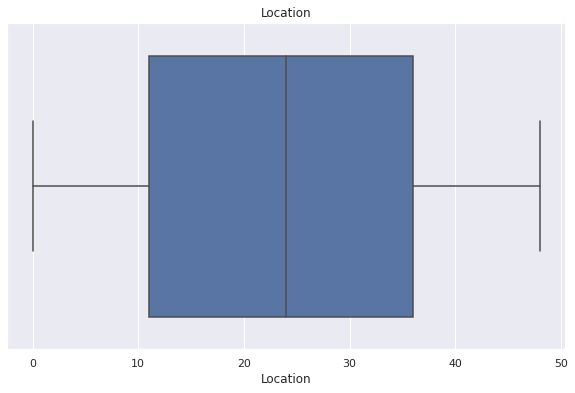

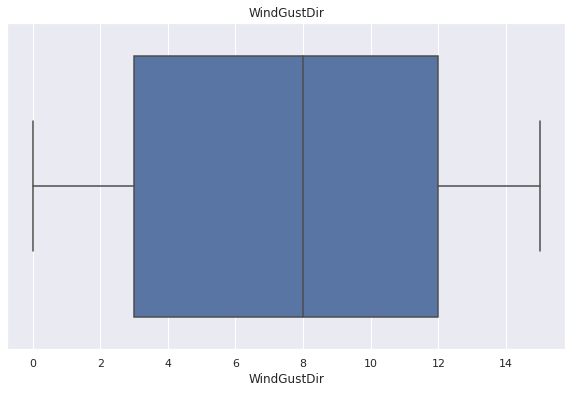

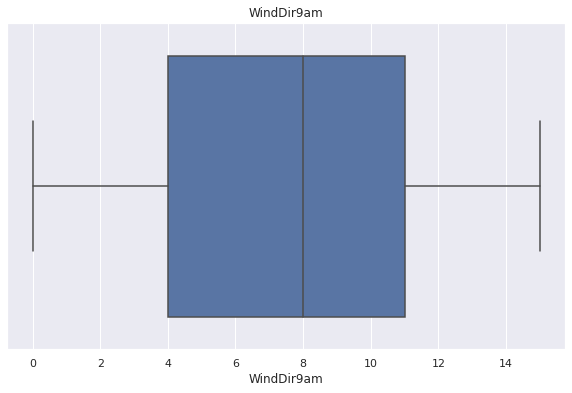

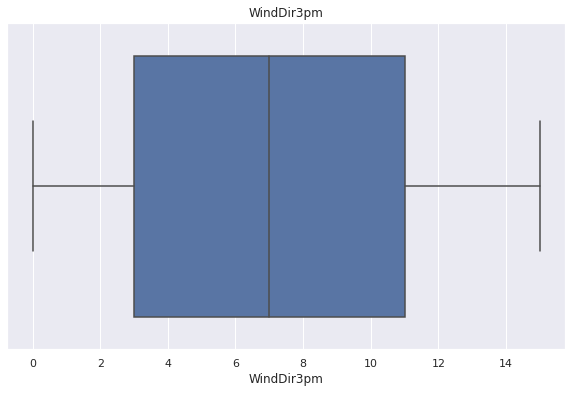

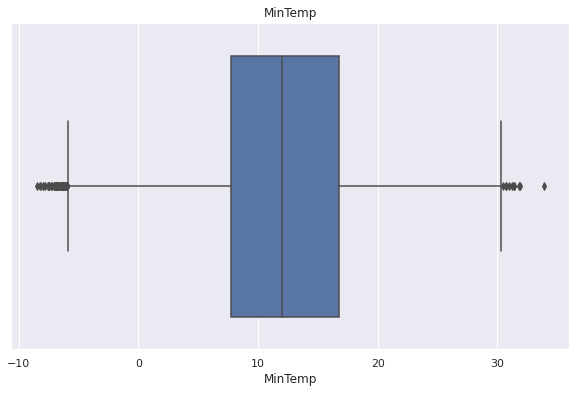

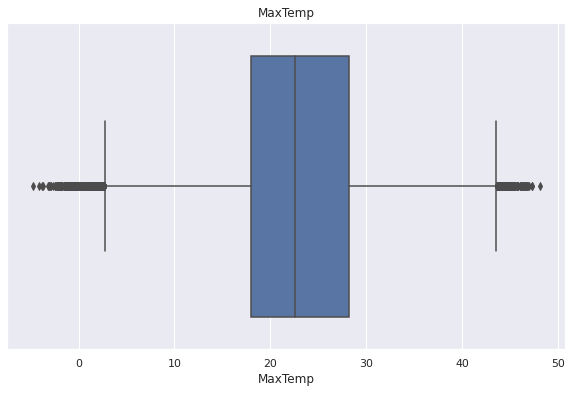

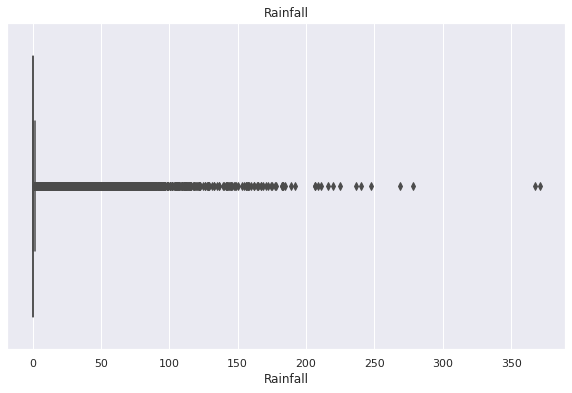

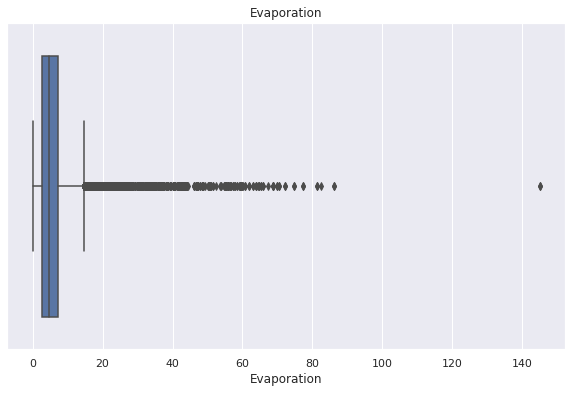

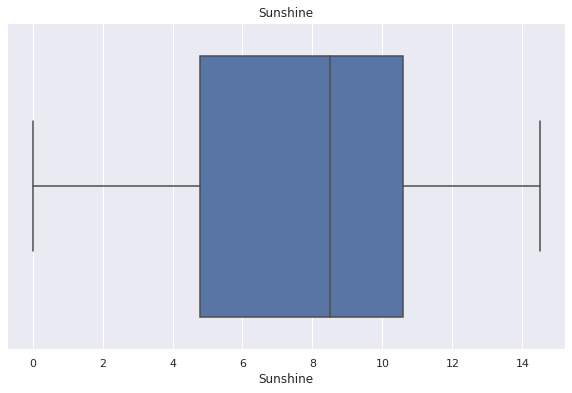

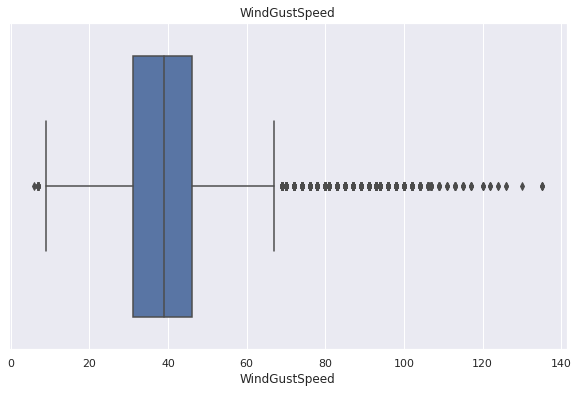

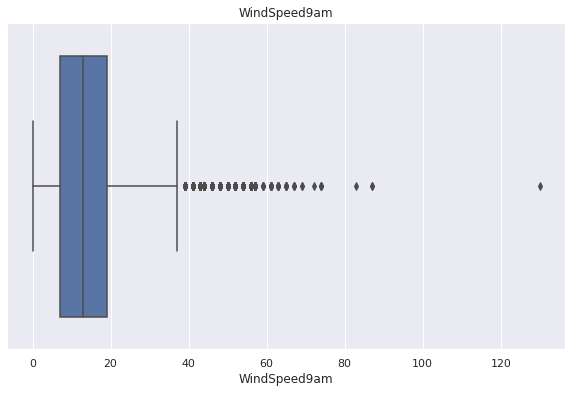

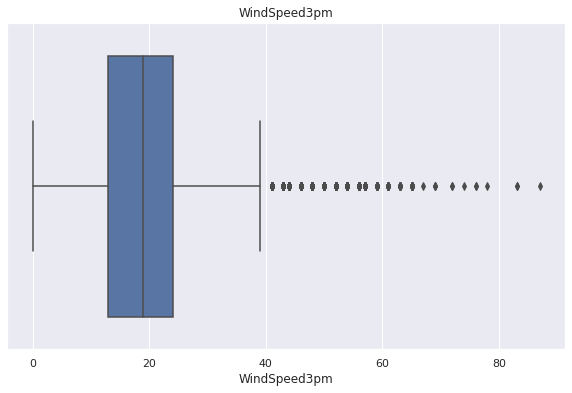

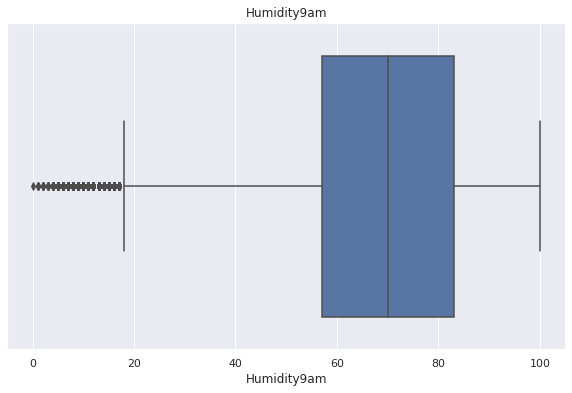

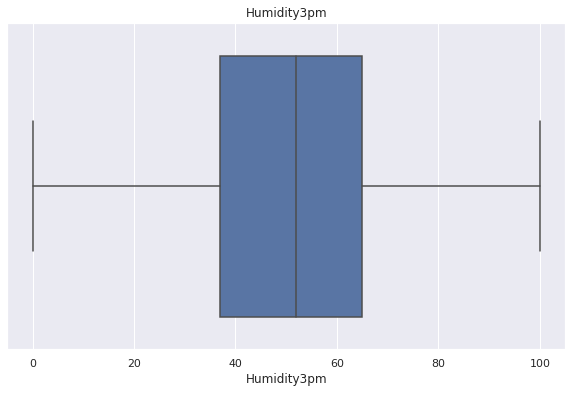

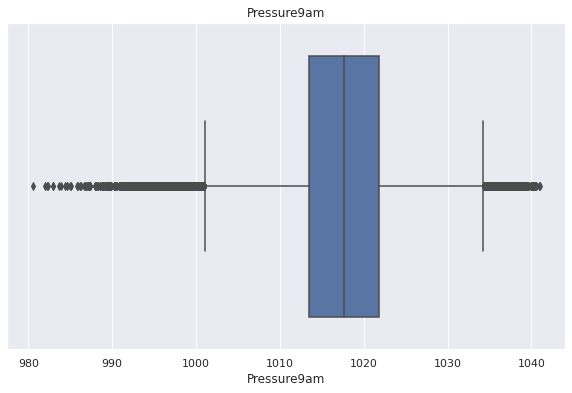

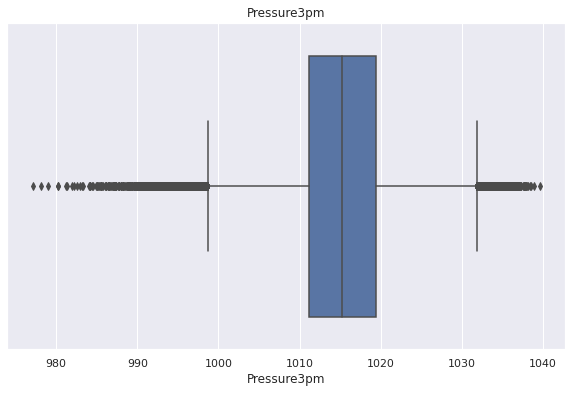

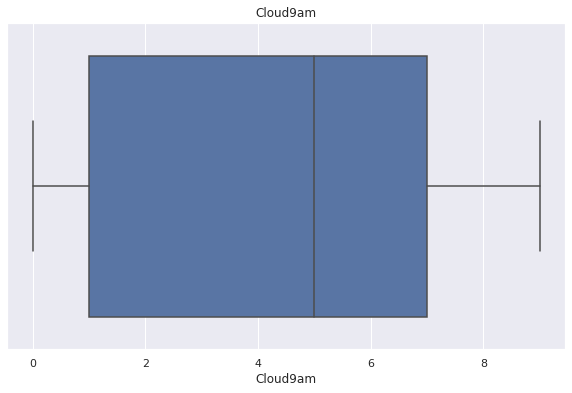

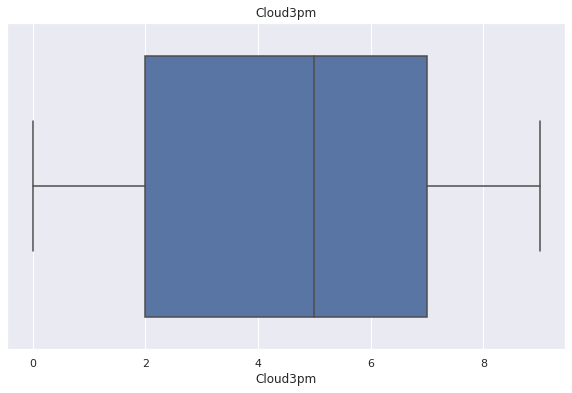

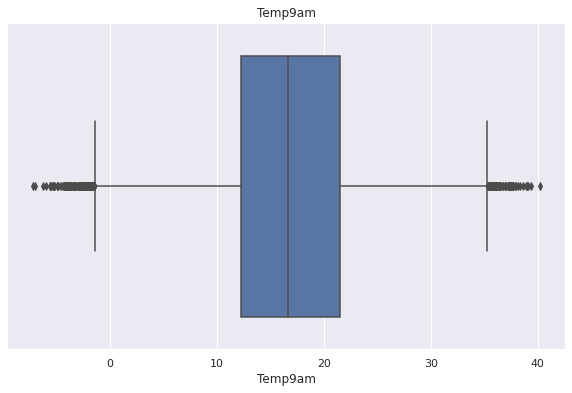

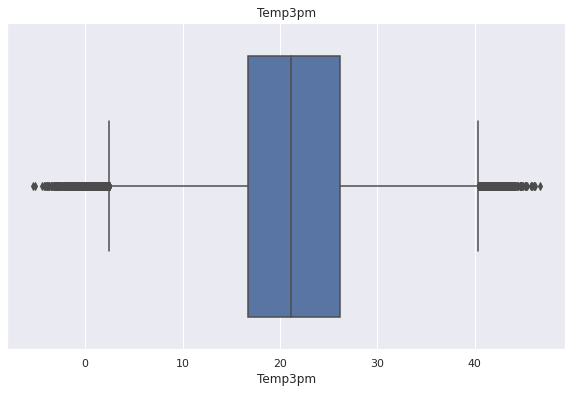

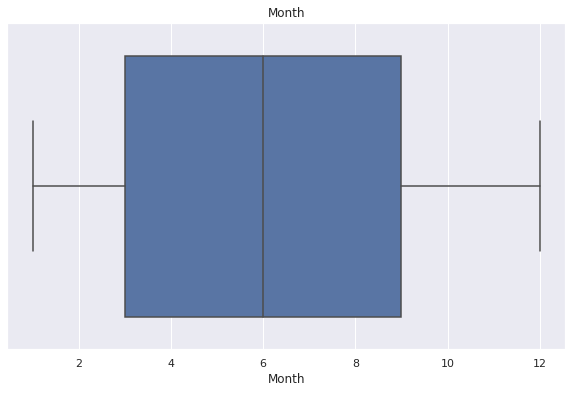

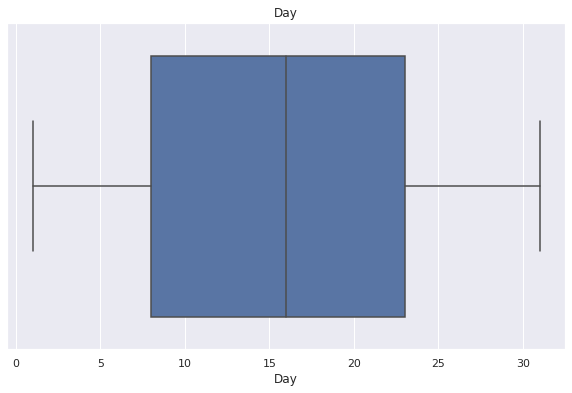

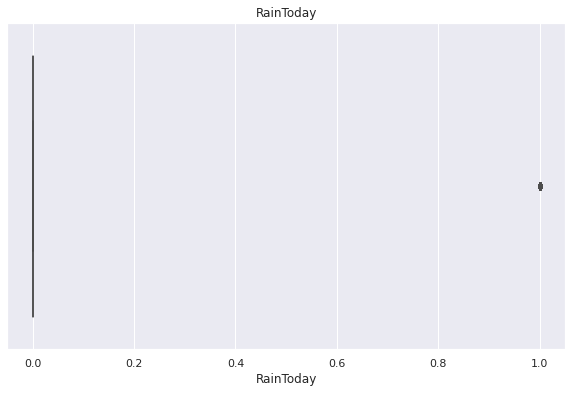

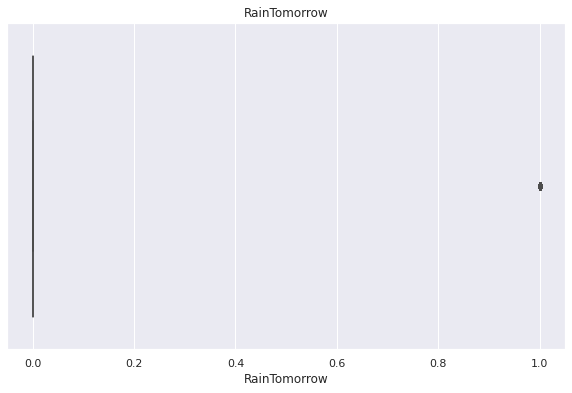

In [39]:
for col in df_new:
  plt.figure(figsize=(10,6))
  sns.boxplot(df_new[col])
  plt.title(col)
  plt.show()

###Handlig outliers using IQR :-

1. MinTemp

In [40]:
IQR = df_new.MinTemp.quantile(0.75) - df_new.MinTemp.quantile(0.25)
lower_bridge = df_new.MinTemp.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.MinTemp.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 9.100000000000001
lower_bridge : -5.950000000000002
upper_bridge : 30.450000000000003


In [41]:
df_new.loc[df_new['MinTemp'] <= -5.95,'MinTemp'] = -5.95
df_new.loc[df_new['MinTemp'] >= 30.45,'MinTemp'] = 30.45 

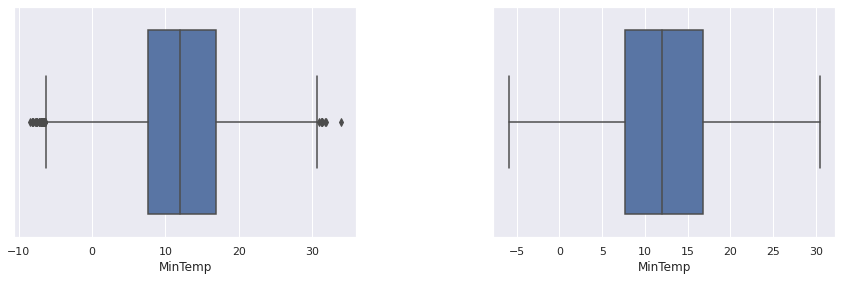

In [42]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['MinTemp'] , ax=ax[0])
sns.boxplot(df_new['MinTemp'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

2. MaxTemp

In [43]:
IQR = df_new.MaxTemp.quantile(0.75) - df_new.MaxTemp.quantile(0.25)
lower_bridge = df_new.MaxTemp.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.MaxTemp.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 10.2
lower_bridge : 2.700000000000001
upper_bridge : 43.5


In [44]:
df_new.loc[df_new['MaxTemp'] <= 2.7,'MaxTemp']= 2.7
df_new.loc[df_new['MaxTemp'] >= 43.5,'MaxTemp']= 43.5

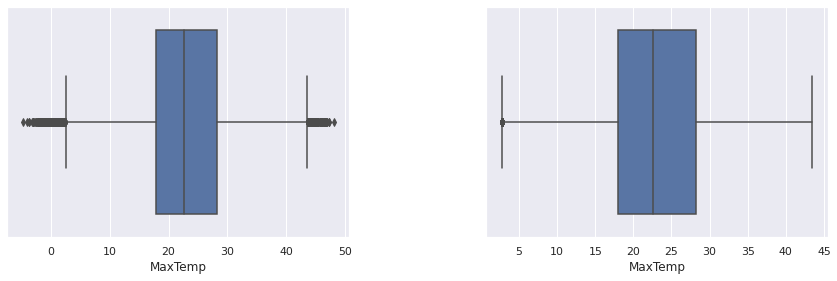

In [45]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['MaxTemp'] , ax=ax[0])
sns.boxplot(df_new['MaxTemp'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

3. Rainfall

In [46]:
IQR = df_new.Rainfall.quantile(0.75) - df_new.Rainfall.quantile(0.25)
lower_bridge = df_new.Rainfall.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.Rainfall.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 0.6
lower_bridge : -0.8999999999999999
upper_bridge : 1.5


In [47]:
df_new.loc[df_new['Rainfall'] <= -0.89,'Rainfall']= -0.89
df_new.loc[df_new['Rainfall'] >= 1.5,'Rainfall']= 1.5

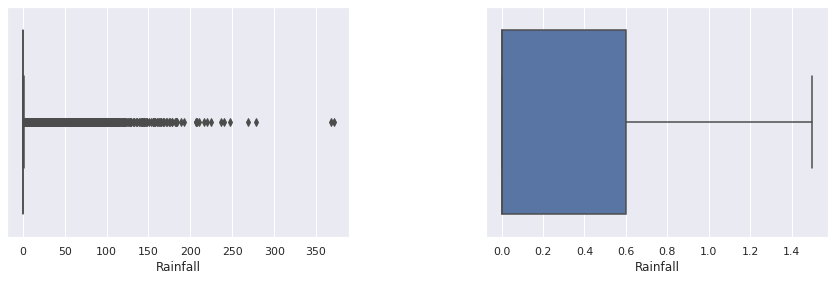

In [48]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['Rainfall'] , ax=ax[0])
sns.boxplot(df_new['Rainfall'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

Evaporation

In [49]:
IQR = df_new.Evaporation.quantile(0.75) - df_new.Evaporation.quantile(0.25)
lower_bridge = df_new.Evaporation.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.Evaporation.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 4.800000000000001
lower_bridge : -4.600000000000001
upper_bridge : 14.600000000000001


In [50]:
df_new.loc[df_new['Evaporation'] <= -4.6,'Evaporation']= -4.6
df_new.loc[df_new['Evaporation'] >= 14.6,'Evaporation']= 14.6

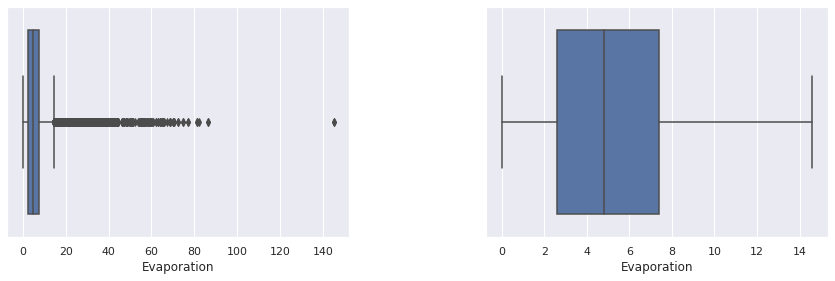

In [51]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['Evaporation'] , ax=ax[0])
sns.boxplot(df_new['Evaporation'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

WindGustSpeed

In [52]:
IQR = df_new.WindGustSpeed.quantile(0.75) - df_new.WindGustSpeed.quantile(0.25)
lower_bridge = df_new.WindGustSpeed.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.WindGustSpeed.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 15.0
lower_bridge : 8.5
upper_bridge : 68.5


In [53]:
df_new.loc[df_new['WindGustSpeed'] <= 8.5,'WindGustSpeed']= 8.5
df_new.loc[df_new['WindGustSpeed'] >= 68.5,'WindGustSpeed']= 68.5

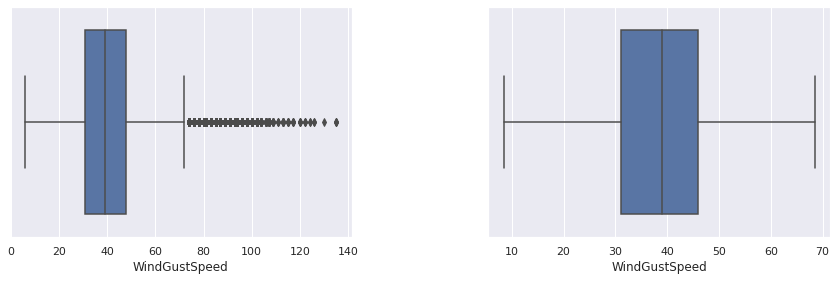

In [54]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['WindGustSpeed'] , ax=ax[0])
sns.boxplot(df_new['WindGustSpeed'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

WindSpeed9am

In [55]:
IQR = df_new.WindSpeed9am.quantile(0.75) - df_new.WindSpeed9am.quantile(0.25)
lower_bridge = df_new.WindSpeed9am.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.WindSpeed9am.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 12.0
lower_bridge : -11.0
upper_bridge : 37.0


In [56]:
df_new.loc[df_new['WindSpeed9am'] <= -11.0,'WindSpeed9am']= -11.0
df_new.loc[df_new['WindSpeed9am'] >= 37.0,'WindSpeed9am']= 37.0

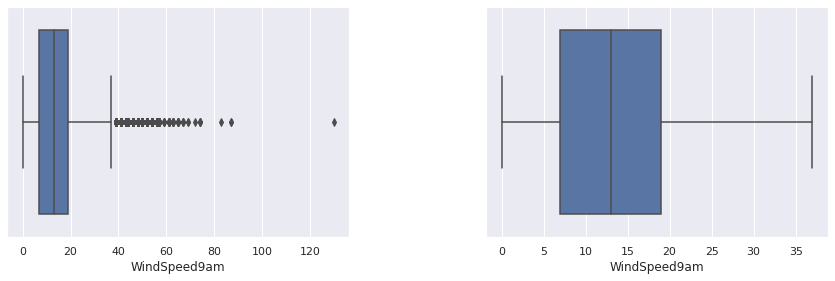

In [57]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['WindSpeed9am'] , ax=ax[0])
sns.boxplot(df_new['WindSpeed9am'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

WindSpeed3pm

In [58]:
IQR = df_new.WindSpeed3pm.quantile(0.75) - df_new.WindSpeed3pm.quantile(0.25)
lower_bridge = df_new.WindSpeed3pm.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.WindSpeed3pm.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 11.0
lower_bridge : -3.5
upper_bridge : 40.5


In [59]:
df_new.loc[df_new['WindSpeed3pm'] <= -3.5,'WindSpeed3pm']= -3.5
df_new.loc[df_new['WindSpeed3pm'] >= 40.5,'WindSpeed3pm']= 40.5

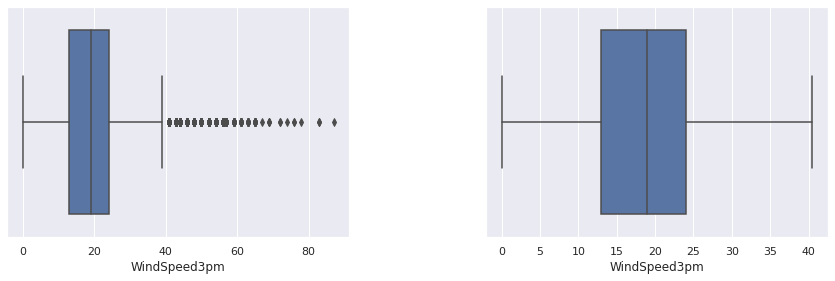

In [60]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['WindSpeed3pm'] , ax=ax[0])
sns.boxplot(df_new['WindSpeed3pm'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

Humidity9am

In [61]:
IQR = df_new.Humidity9am.quantile(0.75) - df_new.Humidity9am.quantile(0.25)
lower_bridge = df_new.Humidity9am.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.Humidity9am.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 26.0
lower_bridge : 18.0
upper_bridge : 122.0


In [62]:
df_new.loc[df_new['Humidity9am'] <= 18.0,'Humidity9am']= 18.0
df_new.loc[df_new['Humidity9am'] >= 122.0,'Humidity9am']= 122.0

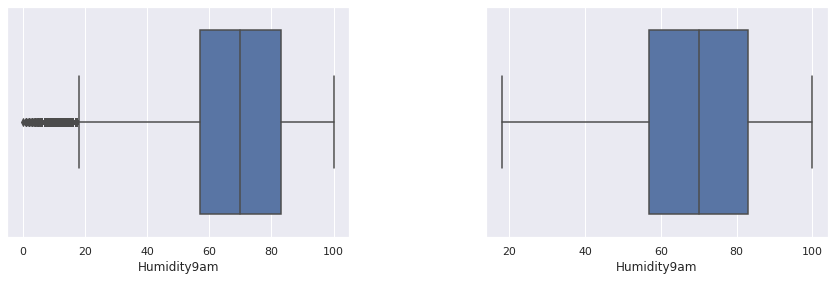

In [63]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['Humidity9am'] , ax=ax[0])
sns.boxplot(df_new['Humidity9am'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

Pressure9am

In [64]:
IQR = df_new.Pressure9am.quantile(0.75) - df_new.Pressure9am.quantile(0.25)
lower_bridge = df_new.Pressure9am.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.Pressure9am.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 8.299999999999955
lower_bridge : 1001.0500000000001
upper_bridge : 1034.25


In [65]:
df_new.loc[df_new['Pressure9am'] <= 1001.05,'Pressure9am']= 1001.05
df_new.loc[df_new['Pressure9am'] >= 1034.25,'Pressure9am']= 1034.25

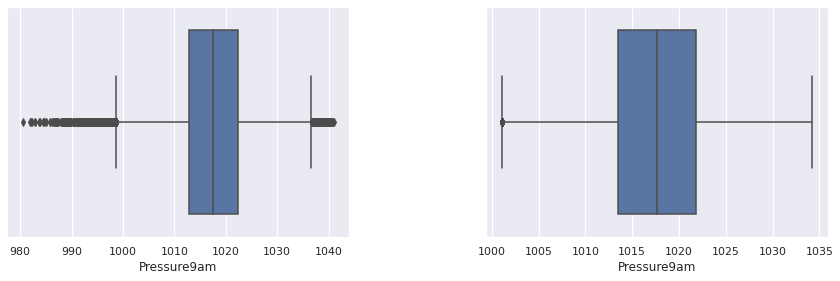

In [66]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['Pressure9am'] , ax=ax[0])
sns.boxplot(df_new['Pressure9am'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

Pressure3pm

In [67]:
IQR = df_new.Pressure3pm.quantile(0.75) - df_new.Pressure3pm.quantile(0.25)
lower_bridge = df_new.Pressure3pm.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.Pressure3pm.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 8.299999999999955
lower_bridge : 998.6500000000001
upper_bridge : 1031.85


In [68]:
df_new.loc[df_new['Pressure3pm'] <= 998.65,'Pressure3pm']= 998.65
df_new.loc[df_new['Pressure3pm'] >= 1031.85,'Pressure3pm']= 1031.85

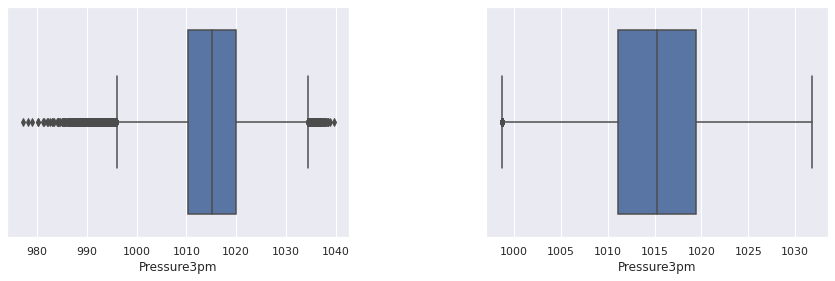

In [69]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['Pressure3pm'] , ax=ax[0])
sns.boxplot(df_new['Pressure3pm'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

Temp9am

In [70]:
IQR = df_new.Temp9am.quantile(0.75) - df_new.Temp9am.quantile(0.25)
lower_bridge = df_new.Temp9am.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.Temp9am.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 9.2
lower_bridge : -1.4999999999999982
upper_bridge : 35.3


In [71]:
df_new.loc[df_new['Temp9am'] <= -1.49,'Temp9am']= -1.49
df_new.loc[df_new['Temp9am'] >= 35.3,'Temp9am']= 35.3

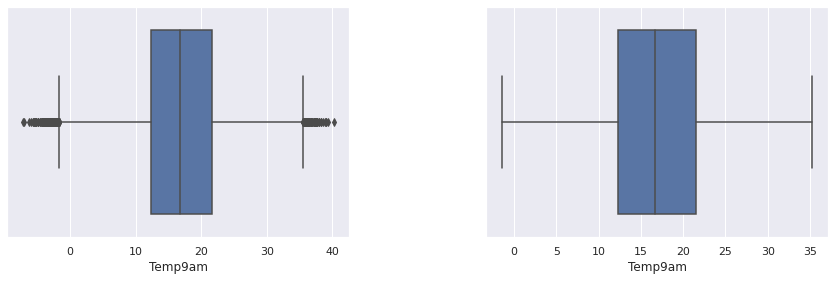

In [72]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['Temp9am'] , ax=ax[0])
sns.boxplot(df_new['Temp9am'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

Temp3pm

In [73]:
IQR = df_new.Temp3pm.quantile(0.75) - df_new.Temp3pm.quantile(0.25)
lower_bridge = df_new.Temp3pm.quantile(0.25)-(1.5*IQR)
upper_bridge = df_new.Temp3pm.quantile(0.75)+(1.5*IQR)
print("IQR :" , IQR)
print("lower_bridge :" , lower_bridge)
print("upper_bridge :" , upper_bridge)

IQR : 9.5
lower_bridge : 2.4499999999999993
upper_bridge : 40.45


In [74]:
df_new.loc[df_new['Temp3pm'] <= 2.44,'Temp3pm']= 2.44
df_new.loc[df_new['Temp3pm'] >= 40.45,'Temp3pm']= 40.45

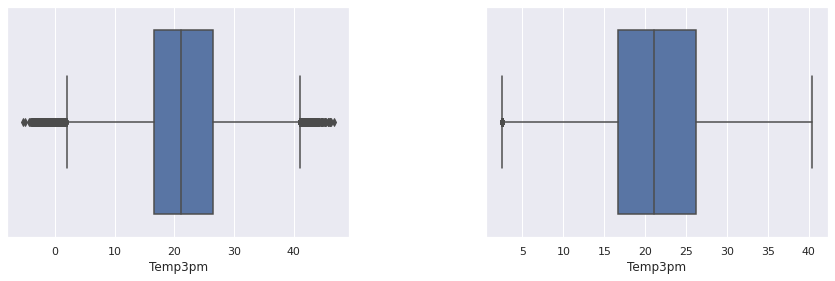

In [75]:
fig , ax =plt.subplots(1,2)
sns.boxplot(df['Temp3pm'] , ax=ax[0])
sns.boxplot(df_new['Temp3pm'] , ax=ax[1])
plt.subplots_adjust(left=0.1 , bottom=0.1 , right=2 , top=0.9 , wspace=0.4 , hspace=0.4 )
plt.show()

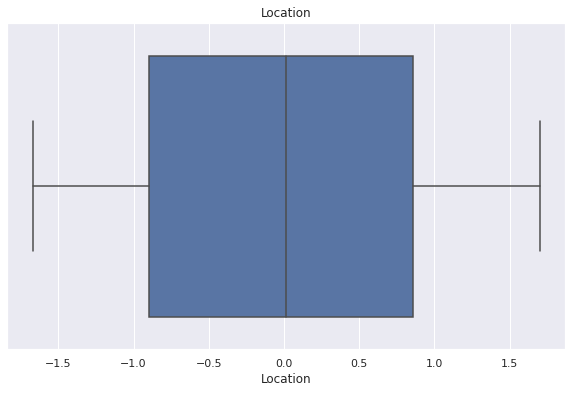

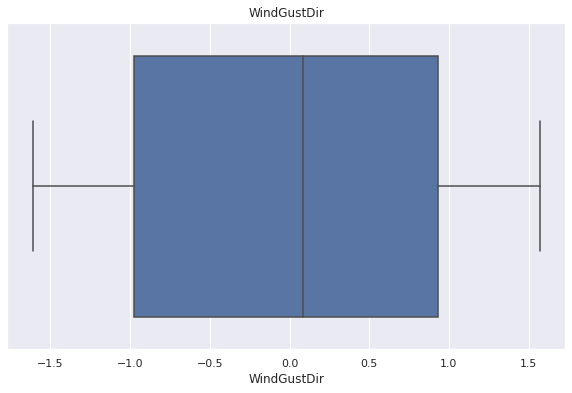

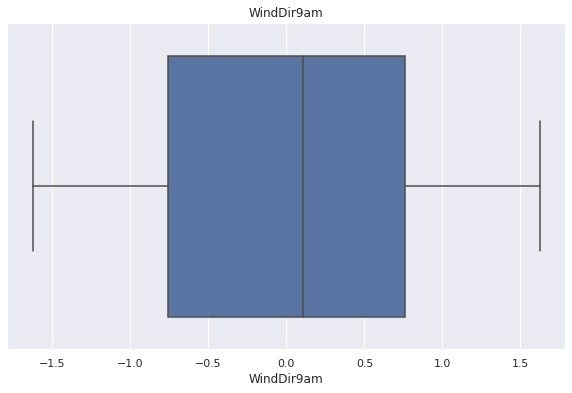

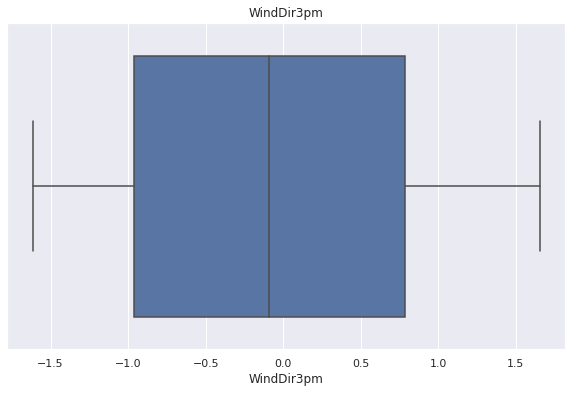

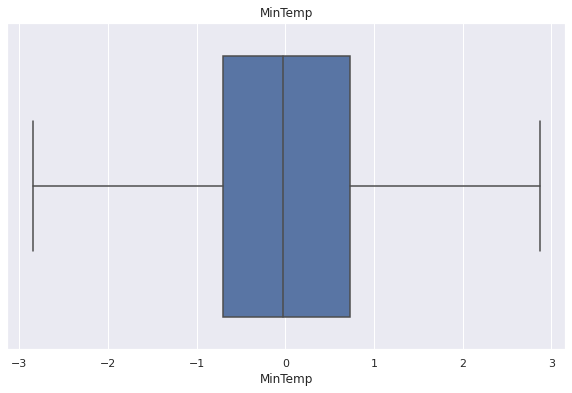

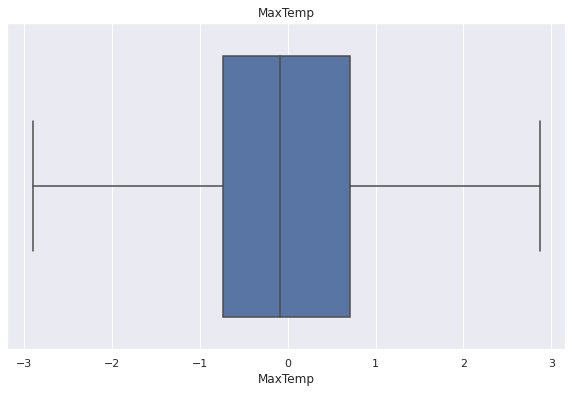

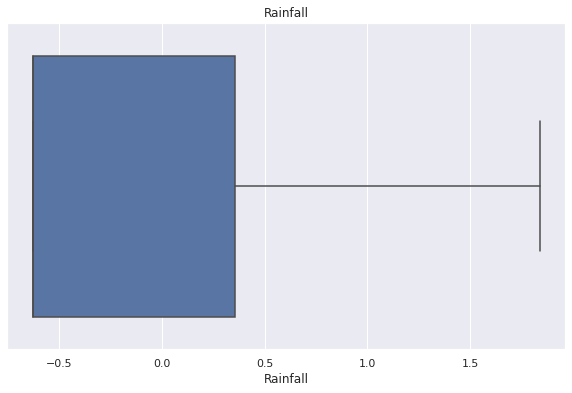

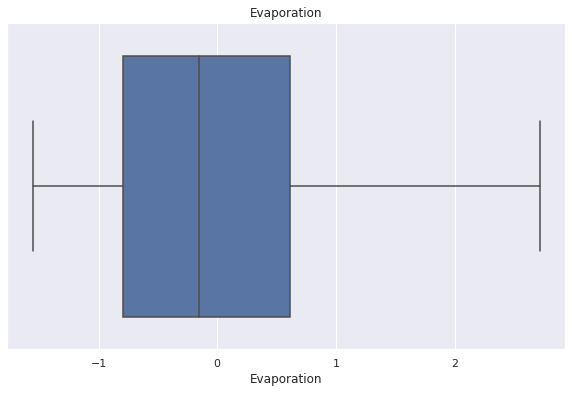

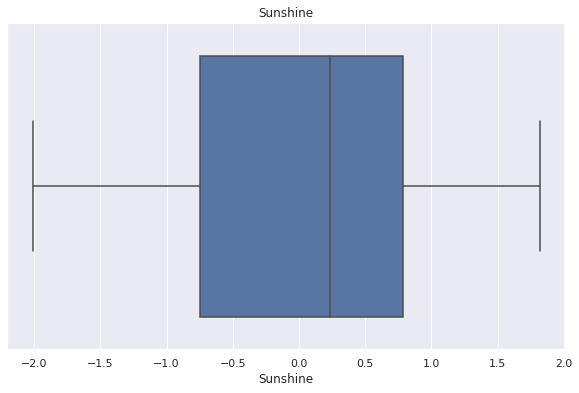

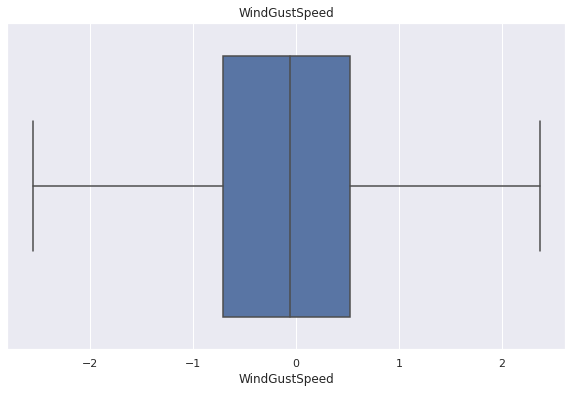

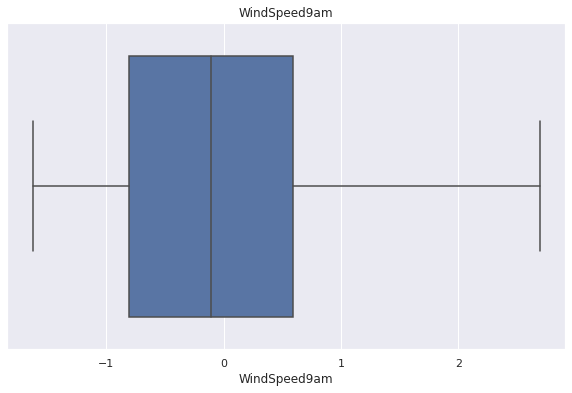

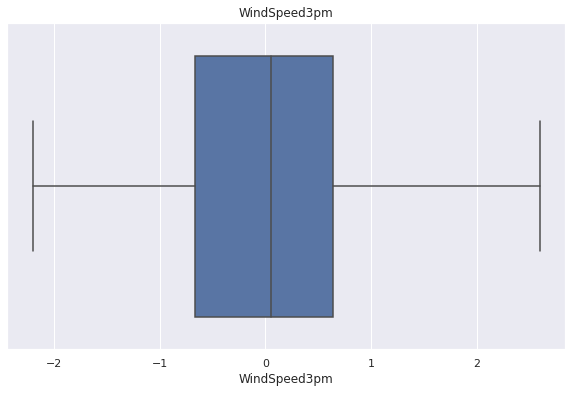

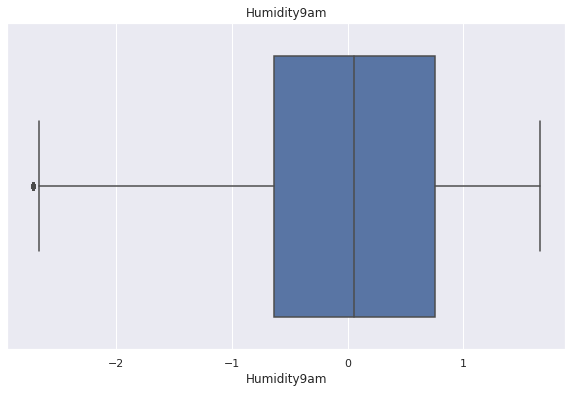

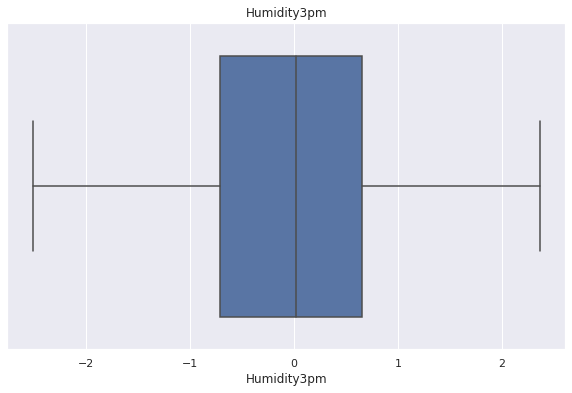

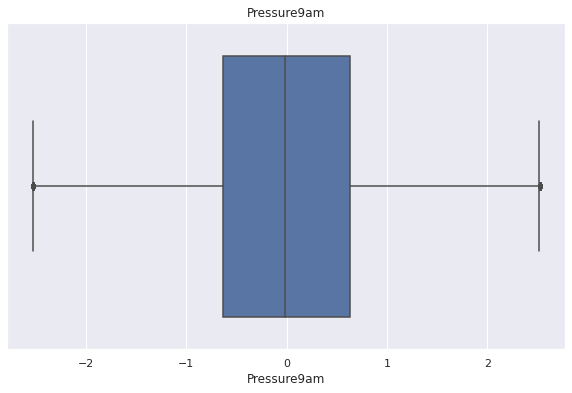

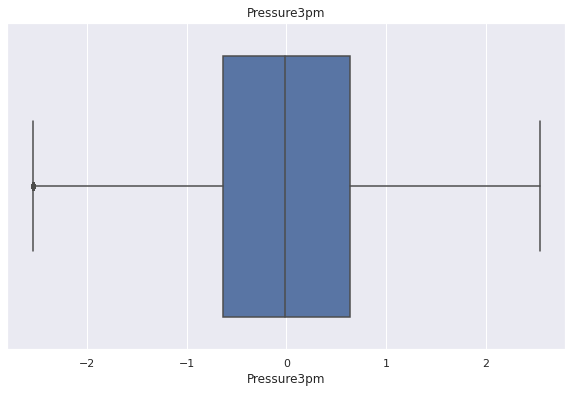

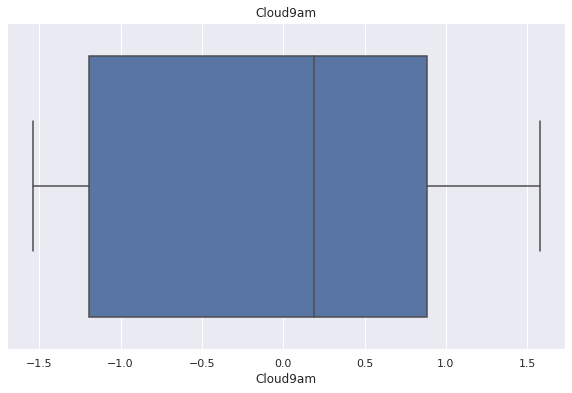

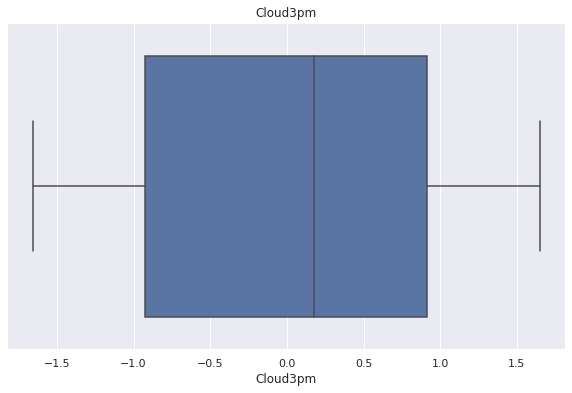

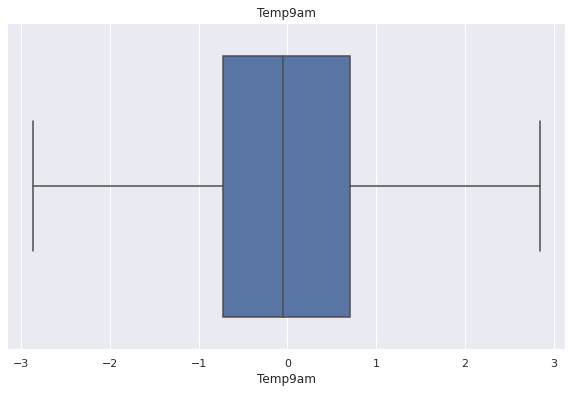

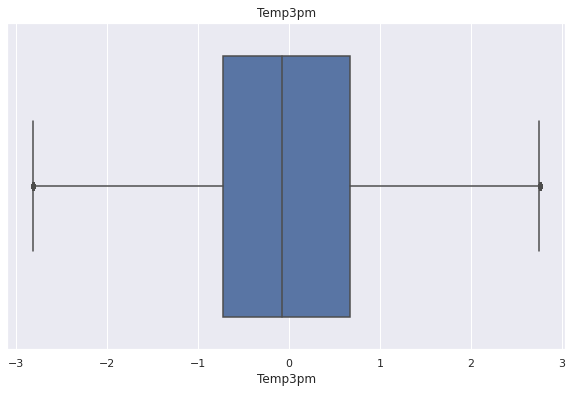

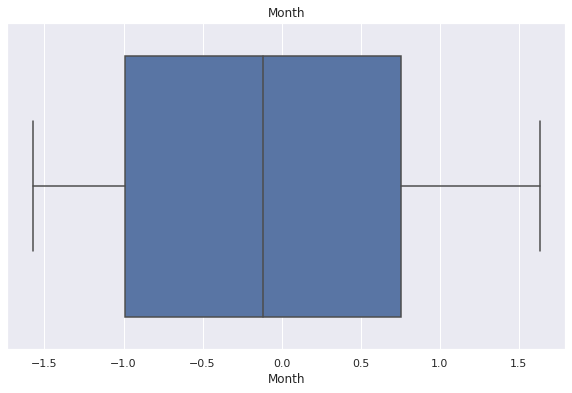

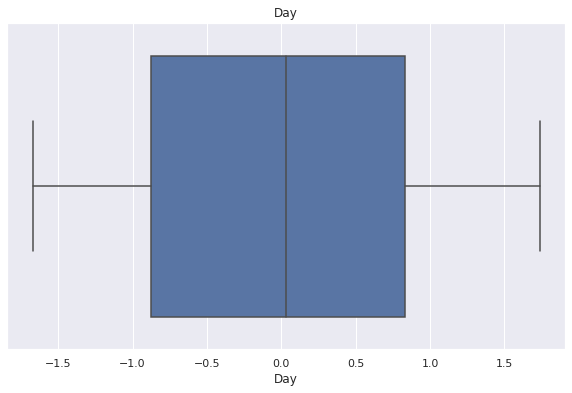

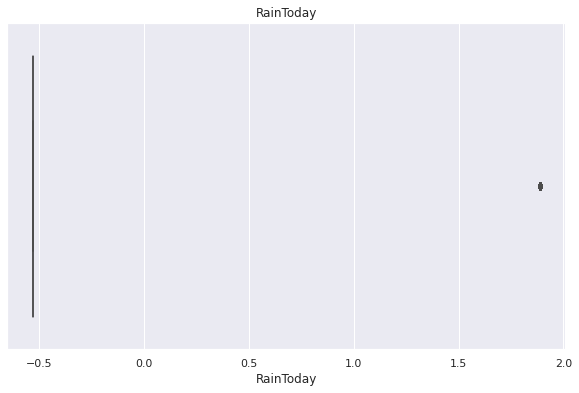

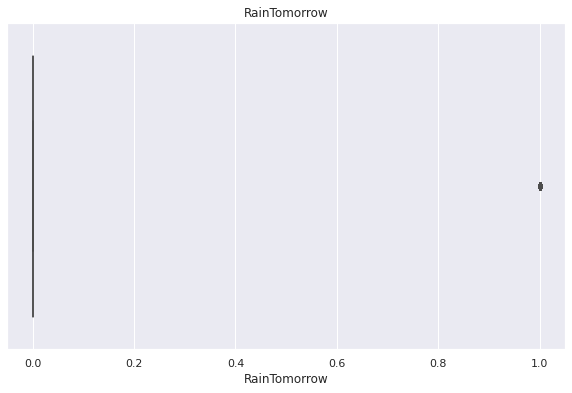

In [129]:
for col in df_new:
  plt.figure(figsize=(10,6))
  sns.boxplot(df_new[col])
  plt.title(col)
  plt.show()

###**Skewness**

In [77]:
from scipy.stats import skew

In [78]:
for col in df_new:
  print(col , ":" , end='')
  print(skew(df_new[col]))

Location :0.015405482453909995
WindGustDir :-0.06258348239035788
WindDir9am :-0.003932732759559149
WindDir3pm :0.0019741901190755847
MinTemp :0.023254439063408423
MaxTemp :0.24072396999051598
Rainfall :1.1615035424864306
Evaporation :0.8128153960284944
Sunshine :-0.498050474914125
WindGustSpeed :0.4603002090212676
WindSpeed9am :0.5112710434020087
WindSpeed3pm :0.3963505474914063
Humidity9am :-0.44038627462828034
Humidity3pm :0.03205403773353382
Pressure9am :0.010242044895877383
Pressure3pm :0.0358683783626625
Cloud9am :-0.22876325089730157
Cloud3pm :-0.22852536156998088
Temp9am :0.09555503944765553
Temp3pm :0.26182730575983065
Month :0.030342554207324783
Day :0.009039988953455782
RainToday :1.3577254789135824
RainTomorrow :1.3578711489433986


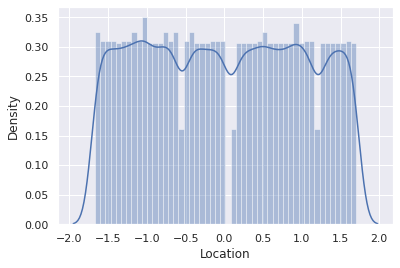

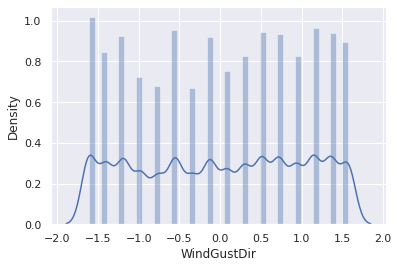

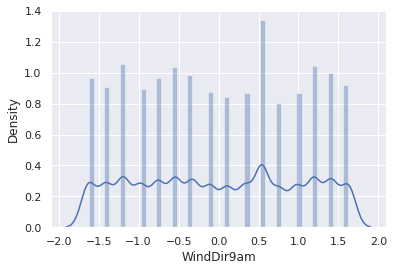

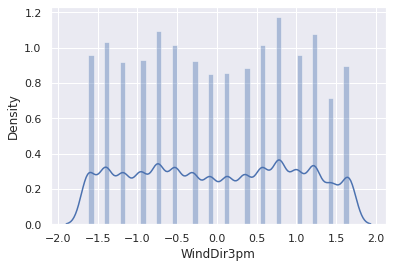

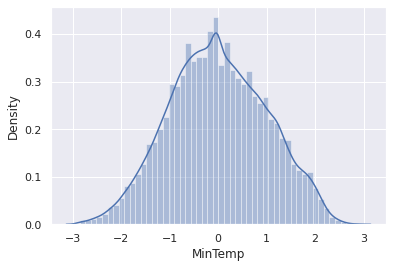

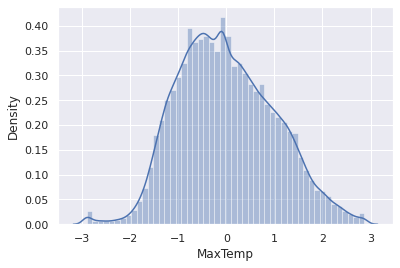

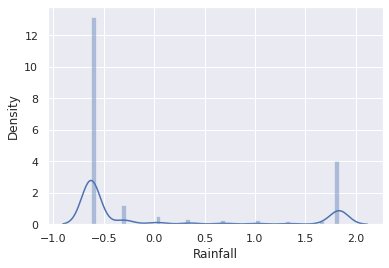

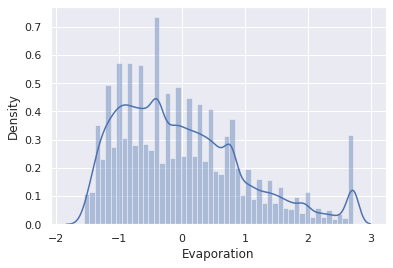

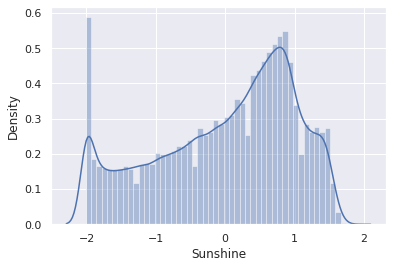

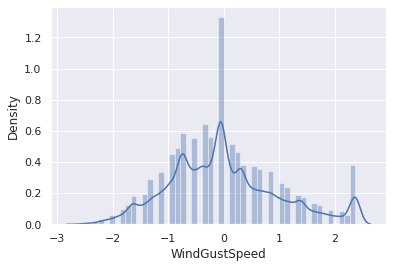

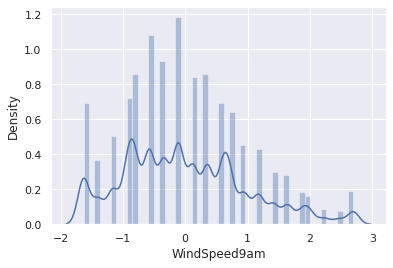

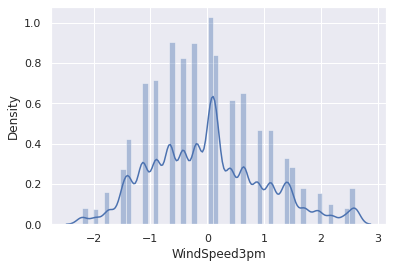

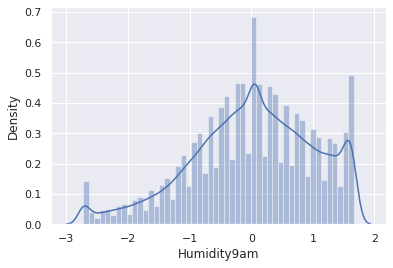

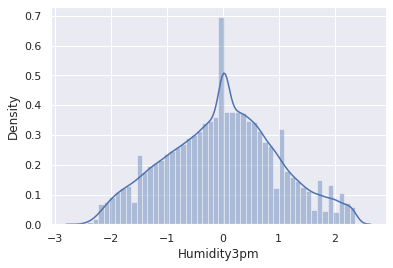

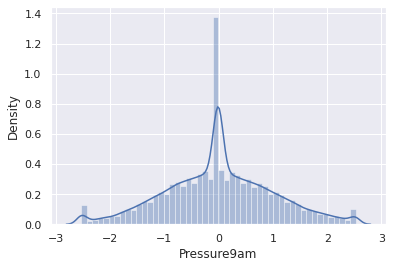

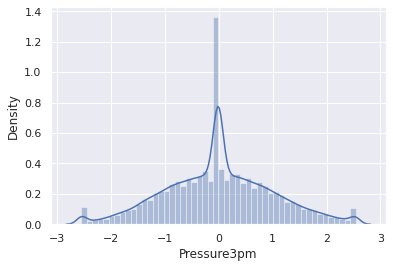

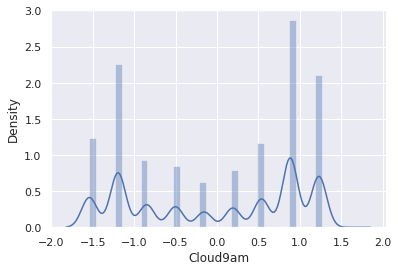

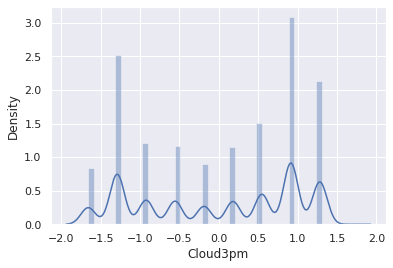

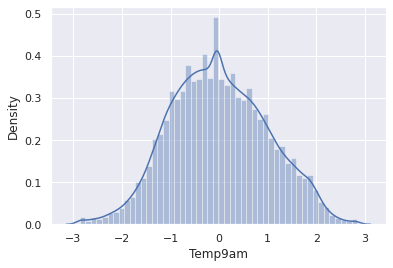

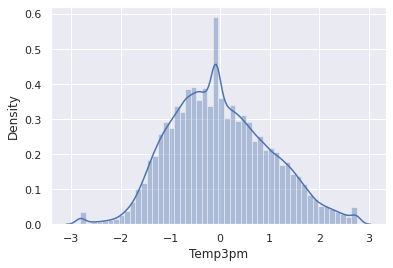

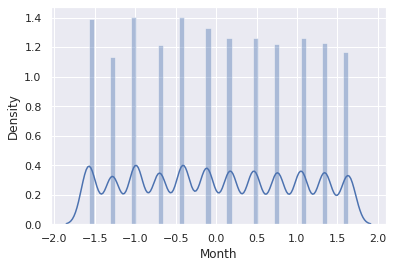

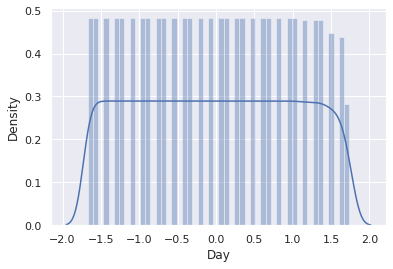

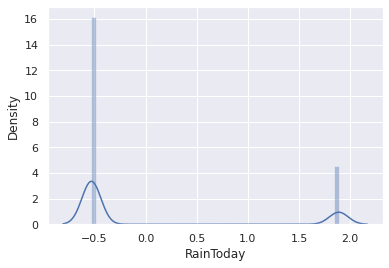

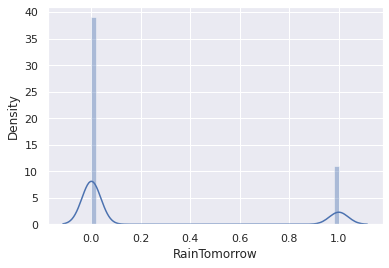

In [127]:
for col in df_new:
  plt.figure()
  sns.distplot(df_new[col])
  plt.show()

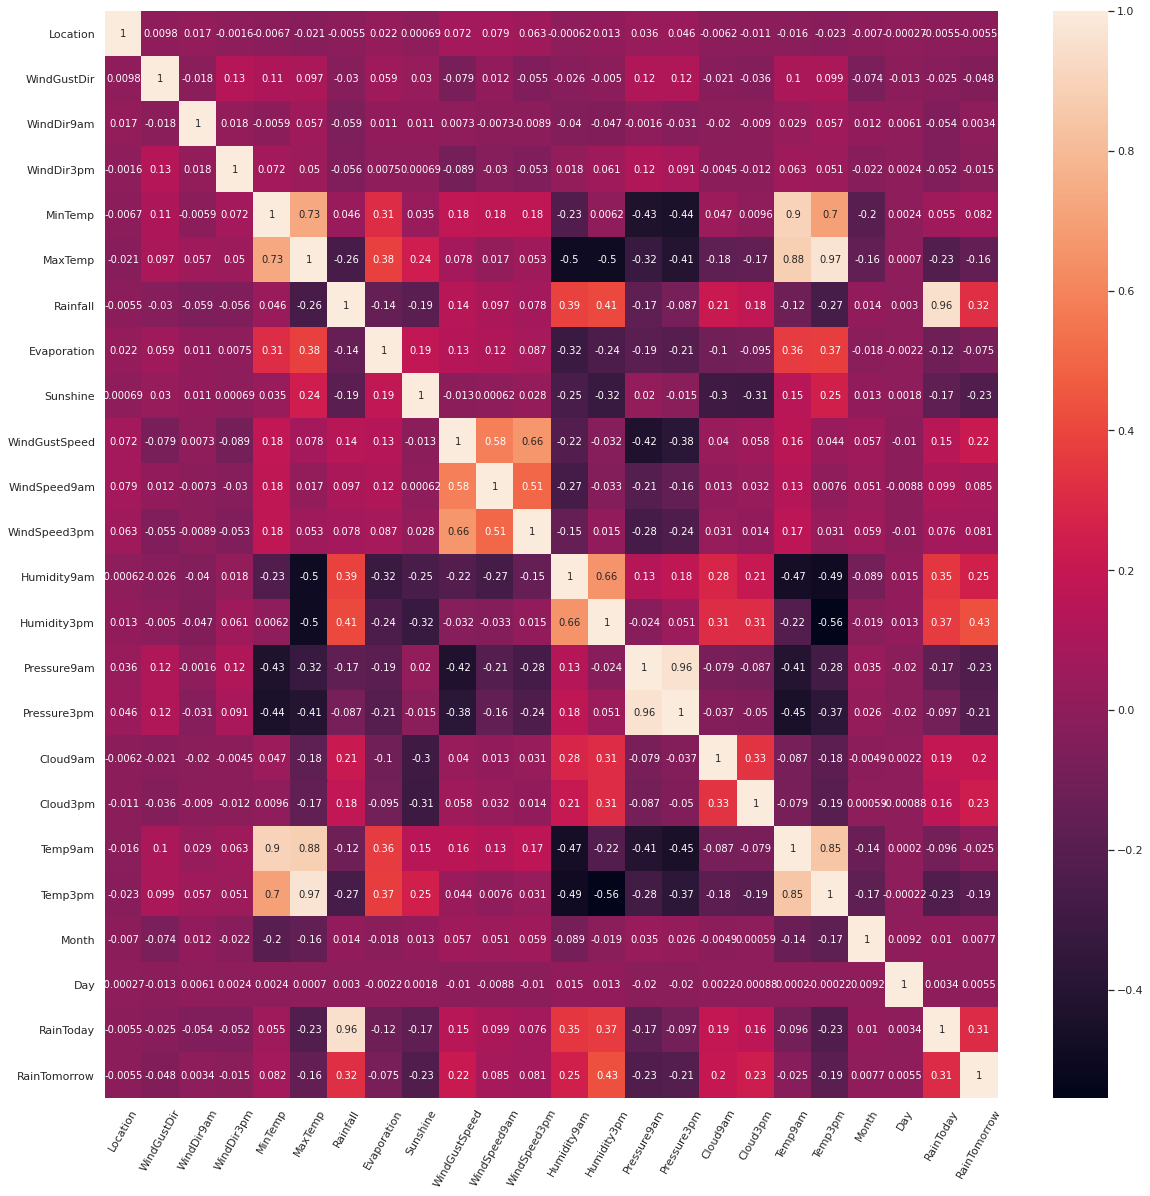

In [128]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr() ,  annot = True)
plt.xticks(rotation = 60)
plt.show()

From above analysis we can see there is some skewness in Rainfall , and RainToday column , but they also have a good coleration with target column i.e RainTomorrow so we will not be handling skewness here or it will effect corelation with our Target column.

In [81]:
df_new.head()

Location  WindGustDir  WindDir9am  ...  Day  RainToday  RainTomorrow
0         2            0           0  ...    1          0             0
1         2            1           1  ...    2          0             0
2         2            2           0  ...    3          0             0
3         2            3           2  ...    4          0             0
4         2            0           3  ...    5          0             0

[5 rows x 24 columns]

###**Feature Scaling**

Firstly , we will be temporarily dropping the target column to perform feature scaling on our data , as we dont need to scale our target / dependent feature.

In [82]:
df_temp = df_new['RainTomorrow']

In [83]:
df_new.drop('RainTomorrow' , axis=1 , inplace=True)

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
for col in df_new:
  sc = StandardScaler()
  df_new[col] = sc.fit_transform(df_new[[col]])

In [86]:
df_new = pd.concat([df_new , df_temp] , axis=1)

In [87]:
df_new.head()

Location  WindGustDir  WindDir9am  ...       Day  RainToday  RainTomorrow
0 -1.531666    -1.612537   -1.627369  ... -1.672844  -0.529795             0
1 -1.531666    -1.400331   -1.410571  ... -1.559140  -0.529795             0
2 -1.531666    -1.188125   -1.627369  ... -1.445436  -0.529795             0
3 -1.531666    -0.975918   -1.193774  ... -1.331732  -0.529795             0
4 -1.531666    -1.612537   -0.976976  ... -1.218028  -0.529795             0

[5 rows x 24 columns]

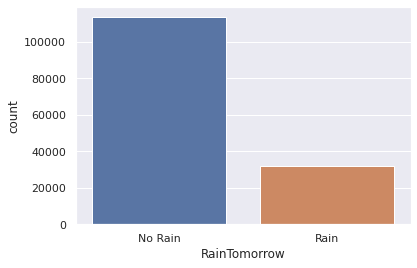

In [88]:
g = sns.countplot(df_new['RainTomorrow'])
g.set_xticklabels(['No Rain','Rain'])
plt.show()

Here we can see our target column/target feature has highly imbalanced data so we will handle this problem later on , when we will be building our model.

We are done with the Pre processing of our data set , now we will begin model building and getting the accuracy of our model.

###**Model Building :-**

In [89]:
df_new.head()

Location  WindGustDir  WindDir9am  ...       Day  RainToday  RainTomorrow
0 -1.531666    -1.612537   -1.627369  ... -1.672844  -0.529795             0
1 -1.531666    -1.400331   -1.410571  ... -1.559140  -0.529795             0
2 -1.531666    -1.188125   -1.627369  ... -1.445436  -0.529795             0
3 -1.531666    -0.975918   -1.193774  ... -1.331732  -0.529795             0
4 -1.531666    -1.612537   -0.976976  ... -1.218028  -0.529795             0

[5 rows x 24 columns]

In [90]:
x = df_new.drop("RainTomorrow", axis=1)
y = df_new["RainTomorrow"]

Splitting data into train set and test set.

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

###Handling imbalanced data

In [93]:
from imblearn.over_sampling import RandomOverSampler

In [94]:
ros = RandomOverSampler(random_state=1)
xtrain_re, ytrain_re = ros.fit_resample(xtrain, ytrain)

###**RandomForestClassifier**

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf=RandomForestClassifier()
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

In [97]:
print(confusion_matrix(ytest,ypred))
rf_acc = accuracy_score(ytest,ypred)
print(rf_acc)
print(classification_report(ytest,ypred))

[[32752  1463]
 [ 4845  4578]]
0.8554470874008892
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     34215
           1       0.76      0.49      0.59      9423

    accuracy                           0.86     43638
   macro avg       0.81      0.72      0.75     43638
weighted avg       0.85      0.86      0.84     43638



###**CatBoostClassifier**

In [98]:
!pip install catboost

     |████████████████████████████████| 69.2 MB 5.2 kB/s 


In [99]:
from catboost import CatBoostClassifier

In [100]:
cat = CatBoostClassifier(eval_metric = "AUC")
cat.fit(xtrain, ytrain)

Learning rate set to 0.074179
0:	total: 98.2ms	remaining: 1m 38s
1:	total: 142ms	remaining: 1m 10s
2:	total: 183ms	remaining: 1m
3:	total: 227ms	remaining: 56.6s
4:	total: 271ms	remaining: 54s
5:	total: 315ms	remaining: 52.2s
6:	total: 357ms	remaining: 50.7s
7:	total: 403ms	remaining: 49.9s
8:	total: 448ms	remaining: 49.3s
9:	total: 488ms	remaining: 48.4s
10:	total: 528ms	remaining: 47.5s
11:	total: 571ms	remaining: 47s
12:	total: 616ms	remaining: 46.8s
13:	total: 660ms	remaining: 46.5s
14:	total: 728ms	remaining: 47.8s
15:	total: 783ms	remaining: 48.1s
16:	total: 830ms	remaining: 48s
17:	total: 870ms	remaining: 47.5s
18:	total: 912ms	remaining: 47.1s
19:	total: 963ms	remaining: 47.2s
20:	total: 1s	remaining: 46.8s
21:	total: 1.05s	remaining: 46.8s
22:	total: 1.09s	remaining: 46.5s
23:	total: 1.14s	remaining: 46.2s
24:	total: 1.18s	remaining: 46s
25:	total: 1.22s	remaining: 45.8s
26:	total: 1.27s	remaining: 45.9s
27:	total: 1.33s	remaining: 46.2s
28:	total: 1.38s	remaining: 46.2s
29:	t

In [101]:
ypred1 = cat.predict(xtest)
print(confusion_matrix(ytest,ypred1))
cat_acc = accuracy_score(ytest,ypred1)
print(cat_acc)
print(classification_report(ytest,ypred1))

[[32514  1701]
 [ 4294  5129]]
0.8626197350932673
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     34215
           1       0.75      0.54      0.63      9423

    accuracy                           0.86     43638
   macro avg       0.82      0.75      0.77     43638
weighted avg       0.85      0.86      0.85     43638



###**LogisticRegression**

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred2 = logreg.predict(xtest)

In [104]:
print(confusion_matrix(ytest,ypred2))
log_acc = accuracy_score(ytest,ypred2)
print(log_acc)
print(classification_report(ytest,ypred2))

[[32381  1834]
 [ 4910  4513]]
0.8454557954076722
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     34215
           1       0.71      0.48      0.57      9423

    accuracy                           0.85     43638
   macro avg       0.79      0.71      0.74     43638
weighted avg       0.83      0.85      0.83     43638



###**KNeighborsClassifier**

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
ypred3 = knn.predict(xtest)

In [107]:
print(confusion_matrix(ytest,ypred3))
knn_acc = accuracy_score(ytest,ypred3)
print(knn_acc)
print(classification_report(ytest,ypred3))

[[31345  2870]
 [ 5068  4355]]
0.8180943214629451
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     34215
           1       0.60      0.46      0.52      9423

    accuracy                           0.82     43638
   macro avg       0.73      0.69      0.71     43638
weighted avg       0.81      0.82      0.81     43638



###**XGBClassifier**

In [108]:
from xgboost import XGBClassifier

In [109]:
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
ypred4 = xgb.predict(xtest)

In [110]:
print(confusion_matrix(ytest,ypred4))
xgb_acc = accuracy_score(ytest,ypred4)
print(xgb_acc)
print(classification_report(ytest,ypred4))

[[32629  1586]
 [ 4891  4532]]
0.8515743159631514
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     34215
           1       0.74      0.48      0.58      9423

    accuracy                           0.85     43638
   macro avg       0.81      0.72      0.75     43638
weighted avg       0.84      0.85      0.84     43638



###**SVM**

In [111]:
from sklearn.svm import SVC

In [112]:
#svc = SVC()
#svc.fit(xtrain, ytrain)
#ypred5 = svc.predict(xtest)

In [113]:
#print(confusion_matrix(ytest,ypred5))
#svc_acc = accuracy_score(ytest,ypred5)
#print(svc_acc)
#print(classification_report(ytest,ypred5))

Our modeling part is done , we have build 5 different models , now lets check the accuracy of all the models and select the best accuracy from below table.

In [114]:
dict_acc = {'Model' : ['RandomForestClassifier', 'CatBoostClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'XGBClassifier','Support Vector Machine(SVM)'],
            'Accuracy' : [rf_acc, cat_acc, log_acc, knn_acc, xgb_acc, '0.853412']}

df_acc = pd.DataFrame(dict_acc)

In [115]:
from IPython.display import display

In [116]:
df_acc.style.hide_index()

From above table we can conclude we are getting the best accuracy from **CatBoostClassifier = 0.86**

###**Hyperparameter Tuning**

###**1. GridSearchCV**

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
#grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

In [119]:
#gscv = GridSearchCV (estimator = cat, param_grid = grid, scoring ='accuracy', cv = 5)
#gscv.fit(x,y)

In [120]:
#print("Best Parameters :",gscv.best_params_)
#print("Best Score :",gscv.best_score_)

print("Best Parameters : {'max_depth': 3, 'n_estimators': 300} ")
print("Best Score : 0.8164237591090334 ")

Best Parameters : {'max_depth': 3, 'n_estimators': 300} 
Best Score : 0.8164237591090334 


Here the best score we are getting is 0.81.

###**2. RandomizedSearchCV**

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [122]:
#param_dist = { "learning_rate": np.linspace(0,0.2,5), "max_depth": randint(3, 10)}

In [123]:
#rscv = RandomizedSearchCV(cat , param_dist, scoring='accuracy', cv =5)
#rscv.fit(x,y)

In [124]:
#print("Best Parameters :",rscv.best_params_)
#print("Best Score :",rscv.best_score_)

print("Best Parameters : {'learning_rate': 0.05, 'max_depth': 9} ")
print("Best Score : 0.8149525642788396 ")

Best Parameters : {'learning_rate': 0.05, 'max_depth': 9} 
Best Score : 0.8149525642788396 


Here aslo the best score we are getting is 0.81.

###**Saving Model**

In [125]:
import pickle

In [126]:
#save model
#pickle.dump(rf, open('rf.pkl' , 'wb'))
pickle.dump(cat, open('cat.pkl' , 'wb'))
#pickle.dump(logreg, open('log.pkl' , 'wb'))
#pickle.dump(knn, open('knn.pkl' , 'wb'))
pickle.dump(xgb, open('xgb.pkl' , 'wb'))

#load model
rain_predict_model = pickle.load(open('cat.pkl', 'rb'))

#predict output
y_pred = rain_predict_model.predict(xtest)

#accuracy
print('Accuracy of model(CatBoostClassifier) :' , accuracy_score(ytest , y_pred))

Accuracy of model(CatBoostClassifier) : 0.8626197350932673
